In [4]:
import numpy
import random
from matplotlib import pyplot
from matplotlib import colors
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import datetime
import cartopy.crs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from PIL import Image, ImageDraw
import pandas

In [5]:
# Use Pandas to Read Ten Min Sustained Windspeed Data File
Windspeed_File = pandas.read_csv("Ten_Min_Windspeed_Data_Output.csv")
Windspeed_File.head()

,Typhoon Code,Typhoon Name,Bluff Head (Stanley),Central Pier,Cheung Chau,Cheung Chau Beach,Green Island,Hong Kong International Airport,Kai Tak,King's Park,...,Tai Po Kau,Tap Mun East,Tate's Cairn,Tseung Kwan O,Tsing Yi Shell Oil Depot,Tuen Mun Government Offices,Waglan Island,Wetland Park,Wong Chuk Hang,
0,(2016,Nangka,45.0,48.0,60,70.0,74.0,48,37.0,32,...,43.0,58.0,77.0,20.0,26.0,16.0,85.0,23.0,35.0,NaN
1,(2007,Higos,67.0,51.0,108,85.0,60.0,68,56.0,43,...,54.0,76.0,89.0,28.0,39.0,NaN,89.0,30.0,38.0,NaN
2,(2003,Sinlaku,50.0,47.0,77,66.0,54.0,57,45.0,38,...,45.0,62.0,67.0,23.0,33.0,30.0,73.0,22.0,33.0,NaN
3,(2002,Nuri,NaN,40.0,57,58.0,52.0,46,40.0,31,...,39.0,61.0,66.0,19.0,30.0,30.0,60.0,19.0,29.0,
4,(1914,Kajiki,38.0,41.0,63,60.0,59.0,40,32.0,30,...,42.0,53.0,62.0,18.0,26.0,15.0,68.0,17.0,28.0,


In [6]:
# Use Pandas to Read Wind Direction Data File
Wind_Directions_File = pandas.read_csv("Wind_Direction_Data_Output.csv")
Wind_Directions_File.head()

,Typhoon Code,Typhoon Name,N,NNE,NE,ENE,E,ESE,SE,SSE,S,SSW,SW,WSW,W,WNW,NW,NNW,
0,(2002,Nuri,0,0,0,2,15,9,2,3,0,0,0,0,0,0,0,0,
1,(1914,Kajiki,0,3,0,7,22,2,0,0,0,0,0,0,0,0,0,0,
2,(1912,Podul,0,0,0,8,20,2,1,0,0,0,0,0,0,0,0,0,
3,(1911,Bailu,1,0,2,2,1,0,0,0,0,2,2,5,9,3,1,2,
4,(1907,Wipha,0,0,1,3,21,5,4,0,0,0,0,0,0,0,0,0,


In [7]:
# Use Pandas to Read Typhoon CPA Data File
Typhoon_CPA_File = pandas.read_csv("Typhoon_CPA_Data.csv")
Typhoon_CPA_File.head()

,Typhoon Code,Typhoon Name,Highest Typhoon Signal Issued,Closest Point of Approach (km),CPA Bearing,CPA Intensity (km/h),CPA Radius of Maximum Winds (km),CPA Date,CPA Time
0,(2016,Nangka,8,530,SSW,85,130,13/10/2020,17:00
1,(2007,Higos,9,80,WSW,130,28,19/8/2020,05:00
2,(2003,Sinlaku,3,580,SW,55,250,1/8/2020,10:00
3,(2002,Nuri,3,190,SSW,75,60,14/6/2020,02:00
4,(1914,Kajiki,3,330,S,55,185,1/9/2019,21:00


In [8]:
# Use Pandas to Read Each Station's Windspeed Ratio to Average of HK Data File
Windspeed_Ratio_File = pandas.read_csv("Windspeed_Ratio_To_HK_Average_Output.csv")
Windspeed_Ratio_File.head()

,Quadrant,Bluff Head (Stanley),Central Pier,Cheung Chau,Cheung Chau Beach,Green Island,Hong Kong International Airport,Kai Tak,King's Park,Lau Fau Shan,...,Tai Mo Shan,Tai Po Kau,Tate's Cairn,Tseung Kwan O,Tsing Yi Shell Oil Depot,Tuen Mun Government Offices,Waglan Island,Wetland Park,Wong Chuk Hang,
0,Eastern,0.982317,1.020018,1.331294,1.410381,1.337948,1.092860,0.879183,0.664276,0.981458,...,1.789653,0.927412,1.468669,0.482496,0.687209,0.616674,1.456591,0.566153,0.722664,
1,Southern,1.032203,1.015392,1.370514,1.320824,1.327907,1.124406,0.907685,0.682041,0.917341,...,1.703046,0.902764,1.467367,0.495218,0.680184,0.627353,1.520535,0.574582,0.749956,
2,Western,1.031400,0.927260,1.398986,1.312252,1.441225,1.123915,0.876423,0.674758,0.958148,...,1.741025,0.856989,1.650741,0.523875,0.715327,0.644059,1.600562,0.588210,0.667983,
3,Northern,0.995543,0.985570,1.349687,1.210644,1.278806,1.166646,0.935403,0.681322,1.071375,...,1.792995,0.931712,1.463281,0.511684,0.829104,0.740860,1.415606,0.606081,0.734325,


In [9]:
# Convert Windspeed Stations Columm Names Into List
Windspeed_Stations_List = list(Windspeed_File.columns)
del Windspeed_Stations_List[0]
del Windspeed_Stations_List[0]
del Windspeed_Stations_List[len(Windspeed_Stations_List)-1]
#
# Input Windspeed Data Into 2D Array
Windspeed_Array = numpy.zeros((len(Windspeed_File),len(Windspeed_Stations_List)))
for i in range(len(Windspeed_Array)):
    for j in range(len(Windspeed_Array[i])):
        Windspeed_Array[i][j] = Windspeed_File.iloc[i,j+2]

In [10]:
# Create Lists or Arrays of Each Variable
Typhoon_Code_List = list(Typhoon_CPA_File["Typhoon Code"])
Typhoon_Name_List = list(Typhoon_CPA_File["Typhoon Name"])
Typhoon_Signal_Array = numpy.array(Typhoon_CPA_File["Highest Typhoon Signal Issued"])
CPA_Distance_Array = numpy.array(Typhoon_CPA_File["Closest Point of Approach (km)"])
CPA_Bearing_List = list(Typhoon_CPA_File["CPA Bearing"])
CPA_Intensity_Array = numpy.array(Typhoon_CPA_File["CPA Intensity (km/h)"])
CPA_R_Max_Array = numpy.array(Typhoon_CPA_File["CPA Radius of Maximum Winds (km)"])

In [11]:
# Create Directions Circle List
Directions_Circle = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE", "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"]
#
# Create Empty Lists To Store Typhoon Codes and Names In Each Quadrant of CPA Directions
Quadrant_Typhoon_Code = [[], [], [], []]
Quadrant_Typhoon_Name = [[], [], [], []]
Quadrant_Typhoon_Signal = [[], [], [], []]
Quadrant_CPA_Distance = [[], [], [], []]
Quadrant_CPA_Intensity = [[], [], [], []]
Quadrant_CPA_R_Max = [[], [], [], []]
Quadrant_Windspeeds = [[], [], [], []]
#
# Create Empty List To Add Up Wind Directions For Each Quadrant of CPA Directions
Quadrant_Wind_Direction = numpy.zeros((4, 16))
#
# Input Data and Add Up Wind Directions According To Each Quadrant of CPA Directions
for i in range(len(CPA_Bearing_List)):
    if CPA_Bearing_List[i] == Directions_Circle[2] or CPA_Bearing_List[i] == Directions_Circle[3] or \
    CPA_Bearing_List[i] == Directions_Circle[4] or CPA_Bearing_List[i] == Directions_Circle[5]:
        Quadrant_Typhoon_Code[0].append(Typhoon_Code_List[i])
        Quadrant_Typhoon_Name[0].append(Typhoon_Name_List[i])
        Quadrant_Typhoon_Signal[0].append(Typhoon_Signal_Array[i])
        Quadrant_CPA_Distance[0].append(CPA_Distance_Array[i])
        Quadrant_CPA_Intensity[0].append(CPA_Intensity_Array[i])
        Quadrant_CPA_R_Max[0].append(CPA_R_Max_Array[i])
        Quadrant_Windspeeds[0].append(Windspeed_Array[i])
        if i > 2:
            for l in range(len(Directions_Circle)):
                Quadrant_Wind_Direction[0][l] += Wind_Directions_File[Directions_Circle[l]][i-3]
    if CPA_Bearing_List[i] == Directions_Circle[6] or CPA_Bearing_List[i] == Directions_Circle[7] or \
    CPA_Bearing_List[i] == Directions_Circle[8] or CPA_Bearing_List[i] == Directions_Circle[9]:
        Quadrant_Typhoon_Code[1].append(Typhoon_Code_List[i])
        Quadrant_Typhoon_Name[1].append(Typhoon_Name_List[i])
        Quadrant_Typhoon_Signal[1].append(Typhoon_Signal_Array[i])
        Quadrant_CPA_Distance[1].append(CPA_Distance_Array[i])
        Quadrant_CPA_Intensity[1].append(CPA_Intensity_Array[i])
        Quadrant_CPA_R_Max[1].append(CPA_R_Max_Array[i])
        Quadrant_Windspeeds[1].append(Windspeed_Array[i])
        if i > 2:
            for l in range(len(Directions_Circle)):
                Quadrant_Wind_Direction[1][l] += Wind_Directions_File[Directions_Circle[l]][i-3]
    if CPA_Bearing_List[i] == Directions_Circle[10] or CPA_Bearing_List[i] == Directions_Circle[11] or \
    CPA_Bearing_List[i] == Directions_Circle[12] or CPA_Bearing_List[i] == Directions_Circle[13]:
        Quadrant_Typhoon_Code[2].append(Typhoon_Code_List[i])
        Quadrant_Typhoon_Name[2].append(Typhoon_Name_List[i])
        Quadrant_Typhoon_Signal[2].append(Typhoon_Signal_Array[i])
        Quadrant_CPA_Distance[2].append(CPA_Distance_Array[i])
        Quadrant_CPA_Intensity[2].append(CPA_Intensity_Array[i])
        Quadrant_CPA_R_Max[2].append(CPA_R_Max_Array[i])
        Quadrant_Windspeeds[2].append(Windspeed_Array[i])
        if i > 2:
            for l in range(len(Directions_Circle)):
                Quadrant_Wind_Direction[2][l] += Wind_Directions_File[Directions_Circle[l]][i-3]
    if CPA_Bearing_List[i] == Directions_Circle[14] or CPA_Bearing_List[i] == Directions_Circle[15] or \
    CPA_Bearing_List[i] == Directions_Circle[0] or CPA_Bearing_List[i] == Directions_Circle[1]:
        Quadrant_Typhoon_Code[3].append(Typhoon_Code_List[i])
        Quadrant_Typhoon_Name[3].append(Typhoon_Name_List[i])
        Quadrant_Typhoon_Signal[3].append(Typhoon_Signal_Array[i])
        Quadrant_CPA_Distance[3].append(CPA_Distance_Array[i])
        Quadrant_CPA_Intensity[3].append(CPA_Intensity_Array[i])
        Quadrant_CPA_R_Max[3].append(CPA_R_Max_Array[i])
        Quadrant_Windspeeds[3].append(Windspeed_Array[i])
        if i > 2:
            for l in range(len(Directions_Circle)):
                Quadrant_Wind_Direction[3][l] += Wind_Directions_File[Directions_Circle[l]][i-3]

In [12]:
# Calculate Wind Direction Proportion For Each Quadrant of CPA Directions
Quadrant_Wind_Direction_Proportion = numpy.empty((4, 16))
for k in range(4):
    Quadrant_Wind_Direction_Proportion[k] = Quadrant_Wind_Direction[k] / numpy.sum(Quadrant_Wind_Direction[k])
print (Quadrant_Wind_Direction_Proportion * 100)

[[16.74876847  9.68801314  5.58292282  3.9408867   8.70279146  3.44827586
   3.77668309  1.3136289   2.6272578   1.64203612  5.41871921  4.10509031
   9.68801314  9.1954023   6.07553366  8.04597701]
 [ 2.49554367  6.59536542  7.13012478 15.50802139 47.68270945 12.56684492
   6.50623886  0.8912656   0.08912656  0.08912656  0.          0.
   0.08912656  0.          0.08912656  0.26737968]
 [ 0.49079755  1.34969325  3.19018405  9.32515337 38.40490798 21.71779141
  15.70552147  6.50306748  2.33128834  0.85889571  0.          0.
   0.          0.          0.          0.12269939]
 [ 2.58215962  0.23474178  1.17370892  1.4084507   3.52112676  0.70422535
   1.4084507   4.69483568  7.27699531 10.09389671 10.56338028  7.98122066
  20.89201878 15.25821596  8.68544601  3.52112676]]


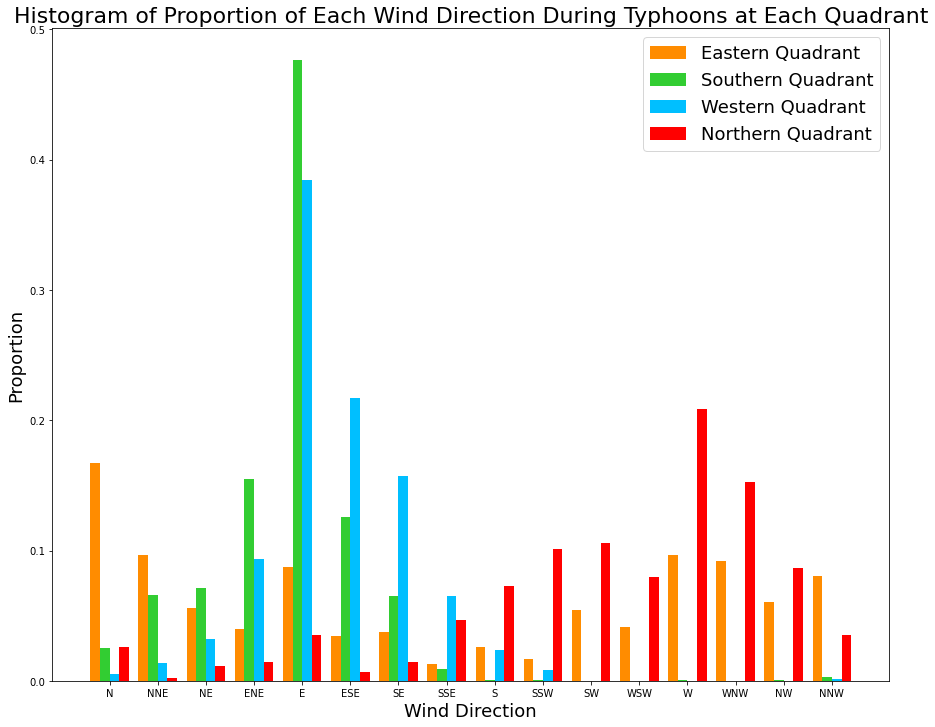

In [13]:
# Draw Bar Graph of Wind Directions For Each Quadrant of CPA Directions
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
Bar_Index = numpy.arange(len(Directions_Circle))
Bar_Width = 0.20
Axes.bar(Bar_Index-Bar_Width*0.5, Quadrant_Wind_Direction_Proportion[0], Bar_Width, color='darkorange', \
label='Eastern Quadrant')
Axes.bar(Bar_Index+Bar_Width*0.5, Quadrant_Wind_Direction_Proportion[1], Bar_Width, color='limegreen', \
label='Southern Quadrant')
Axes.bar(Bar_Index+Bar_Width*1.5, Quadrant_Wind_Direction_Proportion[2], Bar_Width, color='deepskyblue', \
label='Western Quadrant')
Axes.bar(Bar_Index+Bar_Width*2.5, Quadrant_Wind_Direction_Proportion[3], Bar_Width, color='red', \
label='Northern Quadrant')
Axes.set_xlabel('Wind Direction', fontsize=18)
Axes.set_ylabel('Proportion', fontsize=18)
pyplot.title('Histogram of Proportion of Each Wind Direction During Typhoons at Each Quadrant', fontsize=22)
pyplot.legend(loc=1, fontsize=18)
pyplot.xticks(Bar_Index + Bar_Width, Directions_Circle)
Fig.savefig('Wind_Direction_Proportion_Quadrants_Histogram.png')
pyplot.show()

In [14]:
# Create Array of Typhoons Windspeeds for All Typhoons at All Stations
All_Windspeed_List = []
for j in range(len(Windspeed_Array[0])):
    for i in range(len(Windspeed_Array)):
        All_Windspeed_List.append(Windspeed_Array[i][j])
All_Windspeed_Array = numpy.array(All_Windspeed_List)
print (All_Windspeed_Array)
#
# Create Array of Typhoons Windspeeds for Each Quadrant at All Stations
Quadrant_All_Windspeed_List = []
for k in range(4):
    Quadrant_All_Windspeed_List.append([])
    for i in range(len(Quadrant_Windspeeds[k])):
        for j in range(len(Quadrant_Windspeeds[k][0])):
            Quadrant_All_Windspeed_List[k].append(Quadrant_Windspeeds[k][i][j])

[45. 67. 50. ... 45. 39. 15.]


In [15]:
print (len(All_Windspeed_Array))

3360


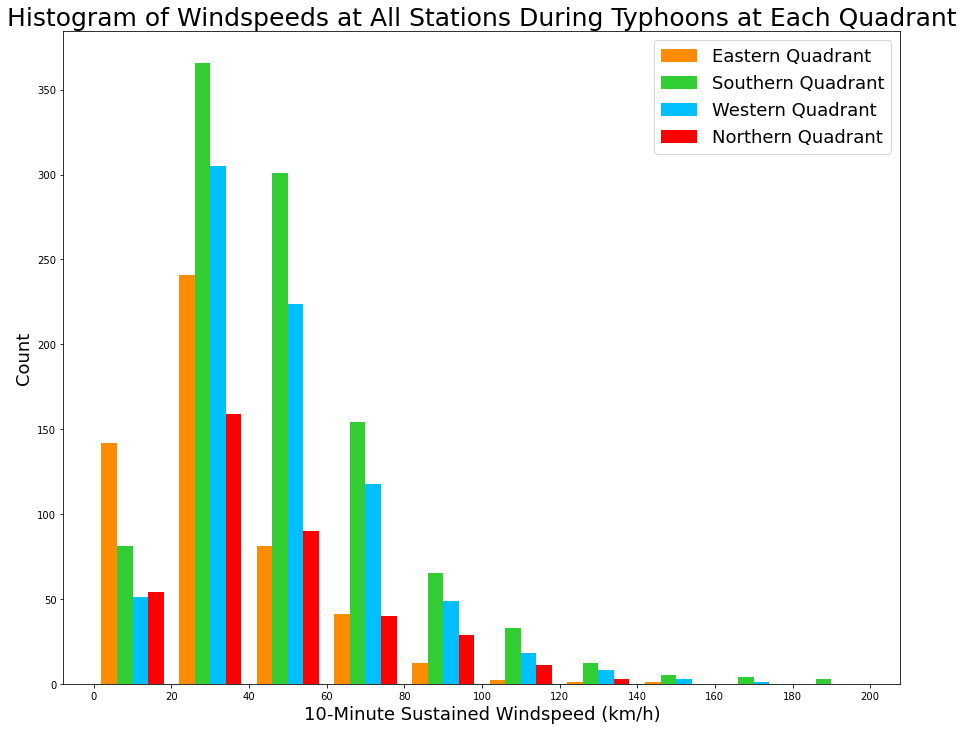

In [12]:
# Draw Histogram of Windspeeds For Each Quadrant of CPA Directions at All Stations
All_Windspeed_Quadrant_Bins = numpy.zeros(11)
for n in range(len(All_Windspeed_Quadrant_Bins)):
    All_Windspeed_Quadrant_Bins[n] = 20*n
Colours = ['darkorange','limegreen','deepskyblue','red']
Labels = ['Eastern Quadrant', 'Southern Quadrant', 'Western Quadrant', 'Northern Quadrant']
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
Axes.hist(Quadrant_All_Windspeed_List, bins=All_Windspeed_Quadrant_Bins, color=Colours,label=Labels)
Axes.set_xlabel('10-Minute Sustained Windspeed (km/h)', fontsize=18)
Axes.set_ylabel('Count', fontsize=18)
pyplot.title('Histogram of Windspeeds at All Stations During Typhoons at Each Quadrant', fontsize=25)
pyplot.legend(loc=1, fontsize=18)
pyplot.xticks(All_Windspeed_Quadrant_Bins)
Fig.savefig('All_Windspeed_Quadrants_Histogram.png')
pyplot.show()

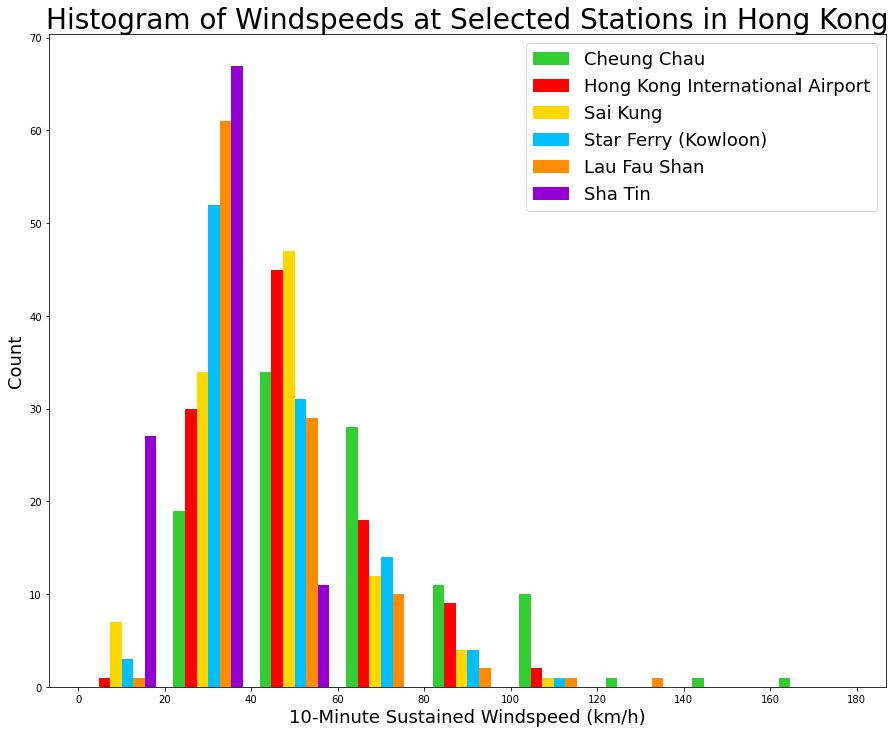

In [13]:
# Draw Histogram of All Typhoon Windspeeds at Selected Windspeed Stations
Diff_Stations_Windspeed_Bins = numpy.zeros(10)
for n in range(len(Diff_Stations_Windspeed_Bins)):
    Diff_Stations_Windspeed_Bins[n] = 20*n
Windspeed_Stations_Plotting = [Windspeed_File["Cheung Chau"], Windspeed_File["Hong Kong International Airport"], \
Windspeed_File["Sai Kung"], Windspeed_File["Star Ferry (Kowloon)"], \
Windspeed_File["Lau Fau Shan"], Windspeed_File["Sha Tin"]]
Colours = ['limegreen', 'red', 'gold', 'deepskyblue', 'darkorange', 'darkviolet']
Labels = ['Cheung Chau', 'Hong Kong International Airport', 'Sai Kung', 'Star Ferry (Kowloon)', 'Lau Fau Shan', 'Sha Tin']
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
Axes.hist(Windspeed_Stations_Plotting, bins=Diff_Stations_Windspeed_Bins, color=Colours,label=Labels)
Axes.set_xlabel('10-Minute Sustained Windspeed (km/h)', fontsize=18)
Axes.set_ylabel('Count', fontsize=18)
pyplot.title('Histogram of Windspeeds at Selected Stations in Hong Kong', fontsize=28)
pyplot.legend(loc=1, fontsize=18)
pyplot.xticks(Diff_Stations_Windspeed_Bins)
Fig.savefig('Selected_Stations_Windspeed_Quadrants_Histogram.png')
pyplot.show()

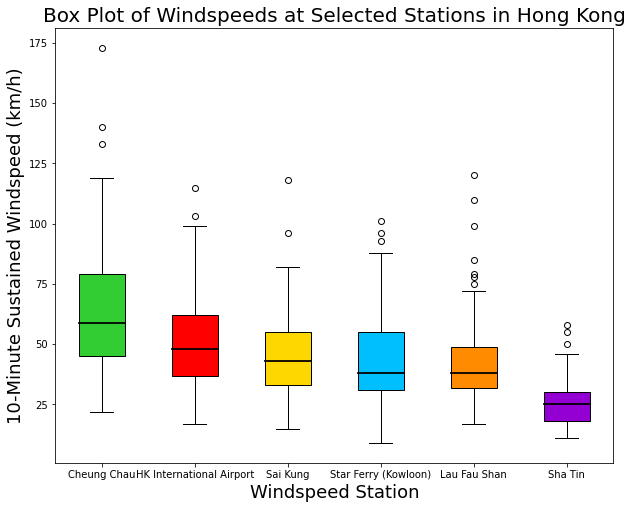

In [14]:
# Draw Box Plot of All Typhoon Windspeeds at Selected Windspeed Stations
Fig = pyplot.figure(figsize=(10,8))
Axes = Fig.gca()
Diff_Stations_Windspeed_Boxplot = pyplot.boxplot(Windspeed_Stations_Plotting, patch_artist = True)
Colours = ['limegreen', 'red', 'gold', 'deepskyblue', 'darkorange', 'darkviolet']
Labels = ['Cheung Chau', 'HK International Airport', 'Sai Kung', 'Star Ferry (Kowloon)', 'Lau Fau Shan', 'Sha Tin']
Axes.set_xticklabels(Labels, fontsize=10)
Axes.set_xlabel('Windspeed Station', fontsize=18)
Axes.set_ylabel('10-Minute Sustained Windspeed (km/h)', fontsize=18)
for patch, color in zip(Diff_Stations_Windspeed_Boxplot['boxes'], Colours): 
    patch.set_facecolor(color)
for median in Diff_Stations_Windspeed_Boxplot['medians']: 
    median.set(color ='black', linewidth = 1.8)
pyplot.title('Box Plot of Windspeeds at Selected Stations in Hong Kong', fontsize=20)
Fig.savefig('Selected_Stations_Windspeed_All_Box_Plot.png')
pyplot.show()

In [15]:
# Create List of Typhoons Windspeeds at Selected Wind Stations For Each Quadrant of CPA Directions
Diff_Stations_Index = [2,5,14,19,9,17]
Diff_Stations_Quadrant_Windspeed_List = []
for k in range(4):
    Diff_Stations_Quadrant_Windspeed_List.append([])
    for j in range(6):
        Diff_Stations_Quadrant_Windspeed_List[k].append([])
        for i in range(len(Quadrant_Windspeeds[k])):
            Diff_Stations_Quadrant_Windspeed_List[k][j].append(Quadrant_Windspeeds[k][i][Diff_Stations_Index[j]])
print (Diff_Stations_Quadrant_Windspeed_List)
print (sorted(Diff_Stations_Quadrant_Windspeed_List[0][0]))
print (sorted(Diff_Stations_Quadrant_Windspeed_List[0][4]))

[[[41.0, 66.0, 75.0, 36.0, 29.0, 35.0, 27.0, 35.0, 23.0, 52.0, 27.0, 40.0, 22.0, 76.0, 52.0, 29.0, 72.0, 22.0, 44.0, 29.0], [36.0, 62.0, 70.0, 36.0, 37.0, 30.0, 26.0, 37.0, 23.0, 39.0, 28.0, 38.0, 23.0, 65.0, 41.0, 28.0, 67.0, 17.0, 37.0, 31.0], [42.0, 56.0, 42.0, 36.0, 28.0, 16.0, 15.0, 30.0, 24.0, 43.0, 24.0, 39.0, 19.0, 51.0, 48.0, 19.0, 62.0, 23.0, 48.0, 15.0], [9.0, 72.0, 77.0, 20.0, 31.0, 28.0, 24.0, 31.0, 20.0, 24.0, 28.0, 37.0, 20.0, 62.0, 24.0, 27.0, 46.0, 15.0, 38.0, 23.0], [37.0, 57.0, 75.0, 38.0, 36.0, 24.0, 17.0, 30.0, 28.0, 41.0, 28.0, 38.0, 28.0, 68.0, 41.0, 24.0, 57.0, 23.0, 49.0, 30.0], [22.0, 28.0, 29.0, 18.0, 15.0, 11.0, 11.0, 18.0, 18.0, 24.0, 15.0, 21.0, 18.0, 40.0, 28.0, 16.0, 32.0, 15.0, 24.0, 24.0]], [[60.0, 57.0, 63.0, 46.0, 87.0, 39.0, 173.0, 45.0, 71.0, 79.0, 55.0, 133.0, 27.0, 93.0, 42.0, 44.0, 68.0, 64.0, 75.0, 48.0, 47.0, 85.0, 61.0, 36.0, 112.0, 57.0, 54.0, 113.0, 89.0, 63.0, 79.0, 78.0, 59.0, 101.0, 59.0, 107.0, 59.0, 79.0], [48.0, 46.0, 40.0, 41.0, 59.0

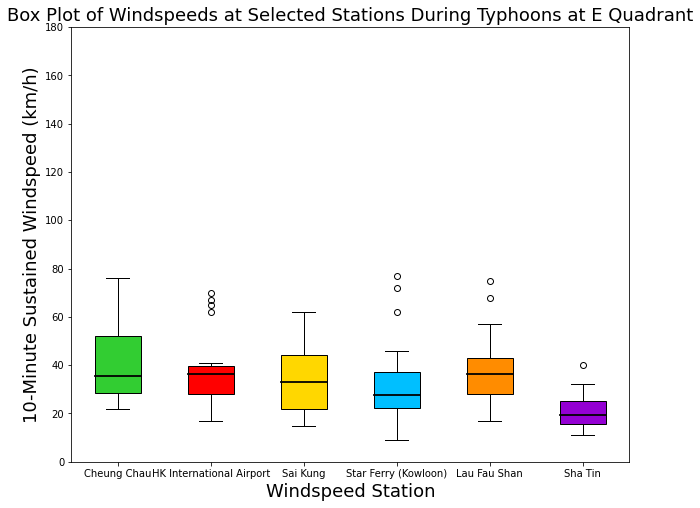

In [16]:
# Draw Box Plot of Typhoons Windspeeds at Selected Wind Stations at Eastern Quadrant of Hong Kong
Fig = pyplot.figure(figsize=(10,8))
Axes = Fig.gca()
Diff_Stations_Windspeed_Eastern_Boxplot = pyplot.boxplot(Diff_Stations_Quadrant_Windspeed_List[0], patch_artist = True)
Colours = ['limegreen', 'red', 'gold', 'deepskyblue', 'darkorange', 'darkviolet']
Labels = ['Cheung Chau', 'HK International Airport', 'Sai Kung', 'Star Ferry (Kowloon)', 'Lau Fau Shan', 'Sha Tin']
Axes.set_xticklabels(Labels, fontsize=10)
Axes.set_xlabel('Windspeed Station', fontsize=18)
Axes.set_ylabel('10-Minute Sustained Windspeed (km/h)', fontsize=18)
pyplot.ylim(0, 180)
for patch, color in zip(Diff_Stations_Windspeed_Eastern_Boxplot['boxes'], Colours): 
    patch.set_facecolor(color)
for median in Diff_Stations_Windspeed_Eastern_Boxplot['medians']: 
    median.set(color ='black', linewidth = 1.8)
pyplot.title('Box Plot of Windspeeds at Selected Stations During Typhoons at E Quadrant', fontsize=18)
Fig.savefig('Selected_Stations_Windspeed_E_Quadrant_Box_Plot.png')
pyplot.show()

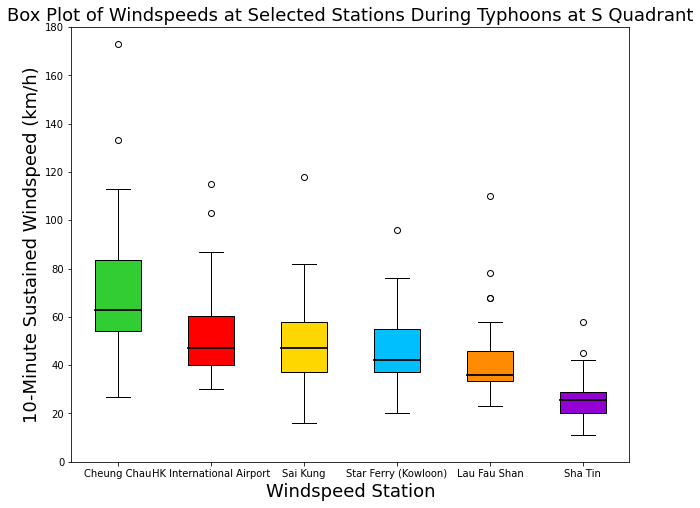

In [17]:
# Draw Box Plot of Typhoons Windspeeds at Selected Wind Stations at Southern Quadrant of Hong Kong
Fig = pyplot.figure(figsize=(10,8))
Axes = Fig.gca()
Diff_Stations_Windspeed_Southern_Boxplot = pyplot.boxplot(Diff_Stations_Quadrant_Windspeed_List[1], patch_artist = True)
Colours = ['limegreen', 'red', 'gold', 'deepskyblue', 'darkorange', 'darkviolet']
Labels = ['Cheung Chau', 'HK International Airport', 'Sai Kung', 'Star Ferry (Kowloon)', 'Lau Fau Shan', 'Sha Tin']
Axes.set_xticklabels(Labels, fontsize=10)
Axes.set_xlabel('Windspeed Station', fontsize=18)
Axes.set_ylabel('10-Minute Sustained Windspeed (km/h)', fontsize=18)
pyplot.ylim(0, 180)
for patch, color in zip(Diff_Stations_Windspeed_Southern_Boxplot['boxes'], Colours): 
    patch.set_facecolor(color)
for median in Diff_Stations_Windspeed_Southern_Boxplot['medians']: 
    median.set(color ='black', linewidth = 1.8)
pyplot.title('Box Plot of Windspeeds at Selected Stations During Typhoons at S Quadrant', fontsize=18)
Fig.savefig('Selected_Stations_Windspeed_S_Quadrant_Box_Plot.png')
pyplot.show()

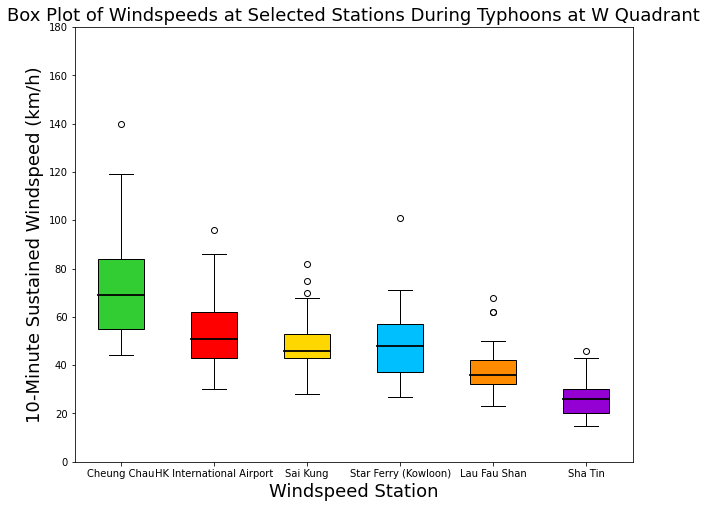

In [18]:
# Draw Box Plot of Typhoons Windspeeds at Selected Wind Stations at Western Quadrant of Hong Kong
Fig = pyplot.figure(figsize=(10,8))
Axes = Fig.gca()
Diff_Stations_Windspeed_Western_Boxplot = pyplot.boxplot(Diff_Stations_Quadrant_Windspeed_List[2], patch_artist = True)
Colours = ['limegreen', 'red', 'gold', 'deepskyblue', 'darkorange', 'darkviolet']
Labels = ['Cheung Chau', 'HK International Airport', 'Sai Kung', 'Star Ferry (Kowloon)', 'Lau Fau Shan', 'Sha Tin']
Axes.set_xticklabels(Labels, fontsize=10)
Axes.set_xlabel('Windspeed Station', fontsize=18)
Axes.set_ylabel('10-Minute Sustained Windspeed (km/h)', fontsize=18)
pyplot.ylim(0, 180)
for patch, color in zip(Diff_Stations_Windspeed_Western_Boxplot['boxes'], Colours): 
    patch.set_facecolor(color)
for median in Diff_Stations_Windspeed_Western_Boxplot['medians']: 
    median.set(color ='black', linewidth = 1.8)
pyplot.title('Box Plot of Windspeeds at Selected Stations During Typhoons at W Quadrant', fontsize=18)
Fig.savefig('Selected_Stations_Windspeed_W_Quadrant_Box_Plot.png')
pyplot.show()

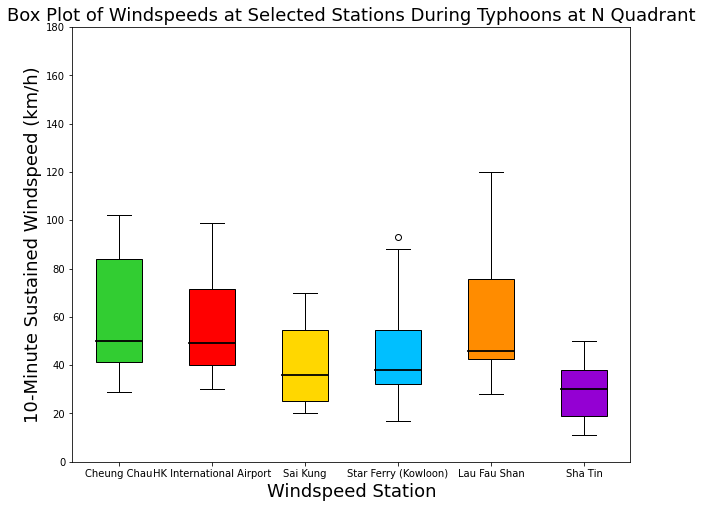

In [19]:
# Draw Box Plot of Typhoons Windspeeds at Selected Wind Stations at Northern Quadrant of Hong Kong
Fig = pyplot.figure(figsize=(10,8))
Axes = Fig.gca()
Diff_Stations_Windspeed_Northern_Boxplot = pyplot.boxplot(Diff_Stations_Quadrant_Windspeed_List[3], patch_artist = True)
Colours = ['limegreen', 'red', 'gold', 'deepskyblue', 'darkorange', 'darkviolet']
Labels = ['Cheung Chau', 'HK International Airport', 'Sai Kung', 'Star Ferry (Kowloon)', 'Lau Fau Shan', 'Sha Tin']
Axes.set_xticklabels(Labels, fontsize=10)
Axes.set_xlabel('Windspeed Station', fontsize=18)
Axes.set_ylabel('10-Minute Sustained Windspeed (km/h)', fontsize=18)
pyplot.ylim(0, 180)
for patch, color in zip(Diff_Stations_Windspeed_Northern_Boxplot['boxes'], Colours): 
    patch.set_facecolor(color)
for median in Diff_Stations_Windspeed_Northern_Boxplot['medians']: 
    median.set(color ='black', linewidth = 1.8)
pyplot.title('Box Plot of Windspeeds at Selected Stations During Typhoons at N Quadrant', fontsize=18)
Fig.savefig('Selected_Stations_Windspeed_N_Quadrant_Box_Plot.png')
pyplot.show()

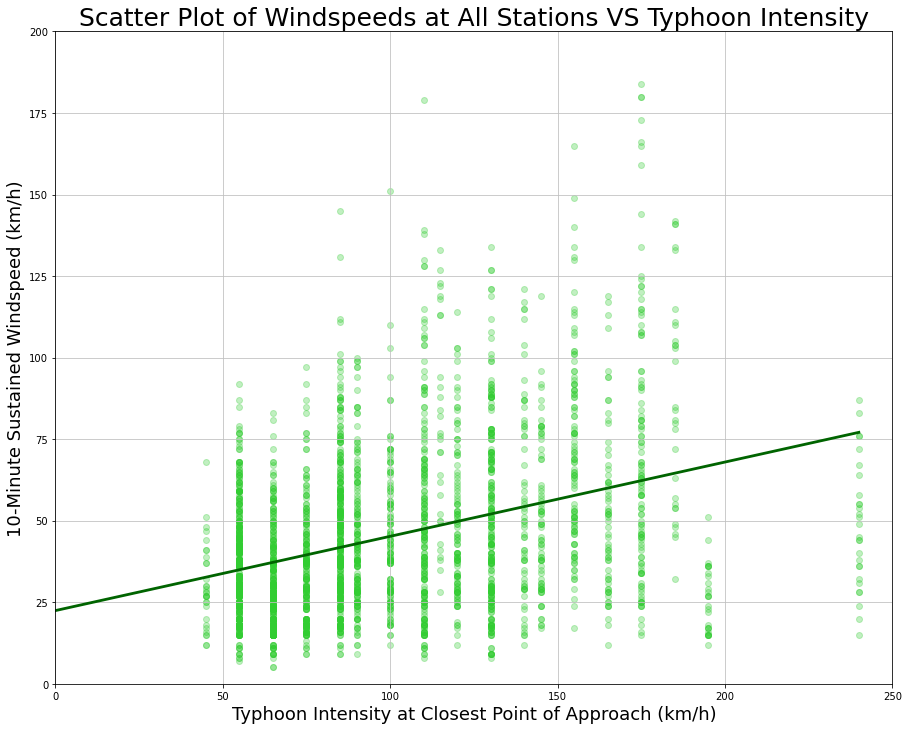

Slope, y Intercept:
0.22770722432293333 22.442071405772055
Correlation Coefficient:
0.3536740657516199


In [20]:
# Create Array of Typhoon Intensities Corresponding With Each Windspeed Data
All_Intensity_Array = numpy.empty(len(All_Windspeed_Array))
for i in range(len(All_Intensity_Array)):
    All_Intensity_Array[i] = CPA_Intensity_Array[i % len(CPA_Intensity_Array)]
All_Intensity_Array_No_Nan = All_Intensity_Array[~numpy.isnan(All_Windspeed_Array)]
All_Windspeed_Array_No_Nan = All_Windspeed_Array[~numpy.isnan(All_Windspeed_Array)]
#
# Draw Scatter Plot of All Windspeeds VS Intensity of All Typhoons
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(All_Intensity_Array, All_Windspeed_Array, c='limegreen', alpha=0.30)
pyplot.title('Scatter Plot of Windspeeds at All Stations VS Typhoon Intensity', fontsize=25)
Axes.set_xlabel('Typhoon Intensity at Closest Point of Approach (km/h)', fontsize=18)
Axes.set_ylabel('10-Minute Sustained Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, 250)
pyplot.ylim(0, 200)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit
All_Windspeed_Intensity_Slope, All_Windspeed_Intensity_Intercept = \
numpy.polyfit(All_Intensity_Array_No_Nan, All_Windspeed_Array_No_Nan, 1)
All_Windspeed_Intensity_Best_Fit_x = numpy.arange(numpy.max(All_Intensity_Array)+1)
All_Windspeed_Intensity_Best_Fit_Line = All_Windspeed_Intensity_Slope*All_Windspeed_Intensity_Best_Fit_x + \
All_Windspeed_Intensity_Intercept
pyplot.plot(All_Windspeed_Intensity_Best_Fit_x, All_Windspeed_Intensity_Best_Fit_Line, c='darkgreen', linewidth=2.8)
Fig.savefig('Windspeed_VS_Intensity_Scatter_Plot.png')
pyplot.show()
print ("Slope, y Intercept:")
print (All_Windspeed_Intensity_Slope, All_Windspeed_Intensity_Intercept)
#
# Find Correlation Coefficient
All_Windspeed_Intensity_Correlation_Matrix = numpy.corrcoef(All_Intensity_Array_No_Nan, All_Windspeed_Array_No_Nan)
All_Windspeed_Intensity_Correlation = All_Windspeed_Intensity_Correlation_Matrix[0][1]
print ("Correlation Coefficient:")
print (All_Windspeed_Intensity_Correlation)

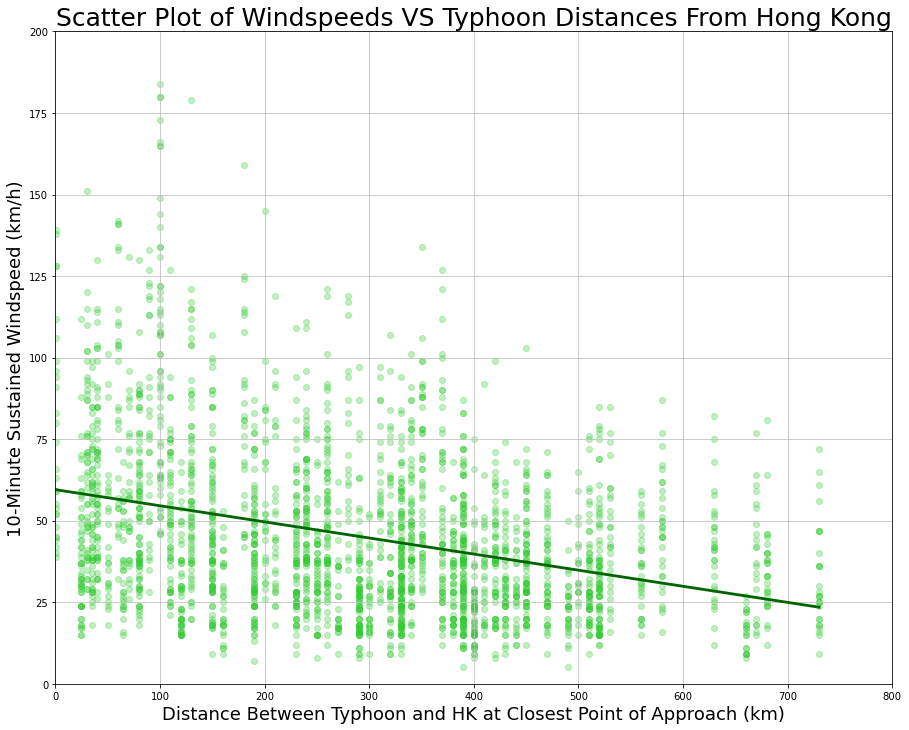

Slope, y Intercept:
-0.04938760450998635 59.528441712411215
Correlation Coefficient:
-0.3324867973533964


In [21]:
# Create Array of Typhoon Distances From Hong Kong Corresponding With Each Windspeed Data
All_Distance_Array = numpy.empty(len(All_Windspeed_Array))
for i in range(len(All_Distance_Array)):
    All_Distance_Array[i] = CPA_Distance_Array[i % len(CPA_Distance_Array)]
All_Distance_Array_No_Nan = All_Distance_Array[~numpy.isnan(All_Windspeed_Array)]
All_Windspeed_Array_No_Nan = All_Windspeed_Array[~numpy.isnan(All_Windspeed_Array)]
#
# Draw Scatter Plot of All Windspeeds Vs Distance From Hong Kong of All Typhoons
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(All_Distance_Array, All_Windspeed_Array, c='limegreen', alpha=0.30)
pyplot.title('Scatter Plot of Windspeeds VS Typhoon Distances From Hong Kong', fontsize=25)
Axes.set_xlabel('Distance Between Typhoon and HK at Closest Point of Approach (km)', fontsize=18)
Axes.set_ylabel('10-Minute Sustained Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, 800)
pyplot.ylim(0, 200)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
All_Windspeed_Distance_Slope, All_Windspeed_Distance_Intercept = \
numpy.polyfit(All_Distance_Array_No_Nan, All_Windspeed_Array_No_Nan, 1)
All_Windspeed_Distance_Best_Fit_x = numpy.arange(numpy.max(All_Distance_Array)+1)
All_Windspeed_Distance_Best_Fit_Line = All_Windspeed_Distance_Slope*All_Windspeed_Distance_Best_Fit_x + \
All_Windspeed_Distance_Intercept
pyplot.plot(All_Windspeed_Distance_Best_Fit_x, All_Windspeed_Distance_Best_Fit_Line, c='darkgreen', linewidth=2.8)
Fig.savefig('Windspeed_VS_Distance_Scatter_Plot.png')
pyplot.show()
print ("Slope, y Intercept:")
print (All_Windspeed_Distance_Slope, All_Windspeed_Distance_Intercept)
#
# Find Correlation Coefficient
All_Windspeed_Distance_Correlation_Matrix = numpy.corrcoef(All_Distance_Array_No_Nan, All_Windspeed_Array_No_Nan)
All_Windspeed_Distance_Correlation = All_Windspeed_Distance_Correlation_Matrix[0][1]
print ("Correlation Coefficient:")
print (All_Windspeed_Distance_Correlation)

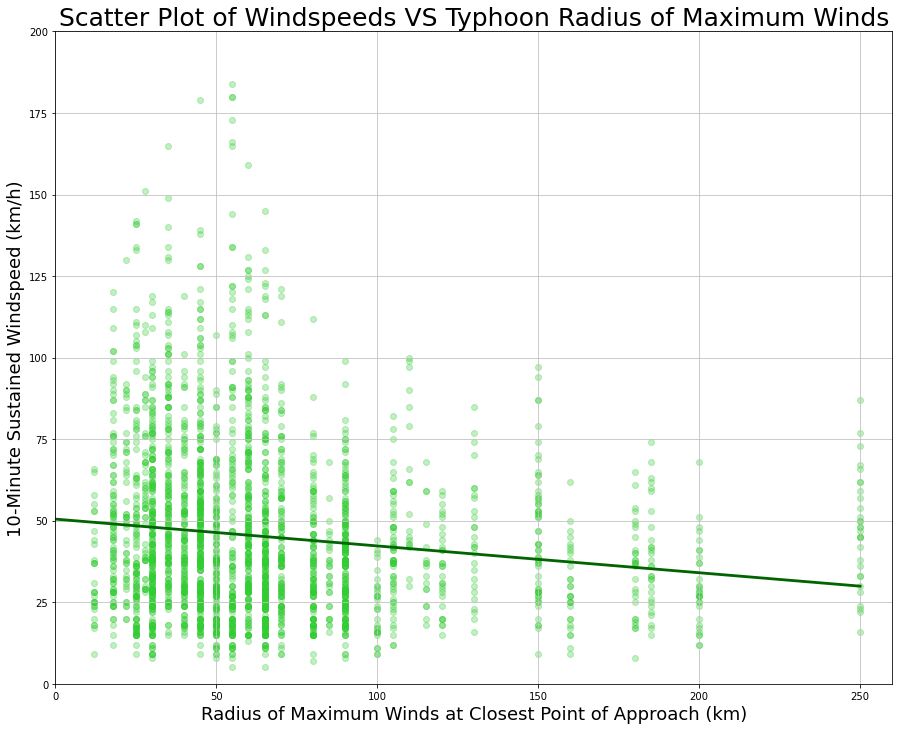

Slope, y Intercept:
-0.08222898756822972 50.494822701176105
Correlation Coefficient:
-0.13559683587195964


In [22]:
# Create Array of Typhoon Radius of Max Winds Corresponding With Each Windspeed Data
All_R_Max_Array = numpy.empty(len(All_Windspeed_Array))
for i in range(len(All_R_Max_Array)):
    All_R_Max_Array[i] = CPA_R_Max_Array[i % len(CPA_R_Max_Array)]
All_R_Max_Array_No_Nan = All_R_Max_Array[~numpy.isnan(All_Windspeed_Array)]
All_Windspeed_Array_No_Nan = All_Windspeed_Array[~numpy.isnan(All_Windspeed_Array)]
#
# Draw Scatter Plot of All Windspeeds VS Radius of Max Winds of All Typhoons
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(All_R_Max_Array, All_Windspeed_Array, c='limegreen', alpha=0.30)
pyplot.title('Scatter Plot of Windspeeds VS Typhoon Radius of Maximum Winds', fontsize=25)
Axes.set_xlabel('Radius of Maximum Winds at Closest Point of Approach (km)', fontsize=18)
Axes.set_ylabel('10-Minute Sustained Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, numpy.max(All_R_Max_Array_No_Nan)+10)
pyplot.ylim(0, 200)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
All_Windspeed_R_Max_Slope, All_Windspeed_R_Max_Intercept = \
numpy.polyfit(All_R_Max_Array_No_Nan, All_Windspeed_Array_No_Nan, 1)
All_Windspeed_R_Max_Best_Fit_x = numpy.arange(numpy.max(All_R_Max_Array)+1)
All_Windspeed_R_Max_Best_Fit_Line = All_Windspeed_R_Max_Slope*All_Windspeed_R_Max_Best_Fit_x + \
All_Windspeed_R_Max_Intercept
pyplot.plot(All_Windspeed_R_Max_Best_Fit_x, All_Windspeed_R_Max_Best_Fit_Line, c='darkgreen', linewidth=2.8)
Fig.savefig('Windspeed_VS_R_Max_Scatter_Plot.png')
pyplot.show()
print ("Slope, y Intercept:")
print (All_Windspeed_R_Max_Slope, All_Windspeed_R_Max_Intercept)
#
# Find Correlation Coefficient
All_Windspeed_R_Max_Correlation_Matrix = numpy.corrcoef(All_R_Max_Array_No_Nan, All_Windspeed_Array_No_Nan)
All_Windspeed_R_Max_Correlation = All_Windspeed_R_Max_Correlation_Matrix[0][1]
print ("Correlation Coefficient:")
print (All_Windspeed_R_Max_Correlation)

In [23]:
# Calculate Theortetical Windspeed of All Typhoons Under Modified Rankine Vortex Model
B = 0.5
All_MRV_Windspeed_Array = numpy.zeros(len(All_Intensity_Array))
for i in range(len(All_MRV_Windspeed_Array)):
    if All_R_Max_Array[i] <= All_Distance_Array[i]:
        All_MRV_Windspeed_Array[i] = All_Intensity_Array[i] * (All_R_Max_Array[i] / All_Distance_Array[i]) ** B
    else:
        All_MRV_Windspeed_Array[i] = All_Intensity_Array[i] * (All_Distance_Array[i] / All_R_Max_Array[i]) ** B
print (All_MRV_Windspeed_Array)
All_MRV_Windspeed_Array_No_Nan = All_MRV_Windspeed_Array[~numpy.isnan(All_Windspeed_Array)]
All_Windspeed_Array_No_Nan = All_Windspeed_Array[~numpy.isnan(All_Windspeed_Array)]

[42.09714731 76.90903718 36.10926904 ... 77.07139547 32.67486892
 33.6269123 ]


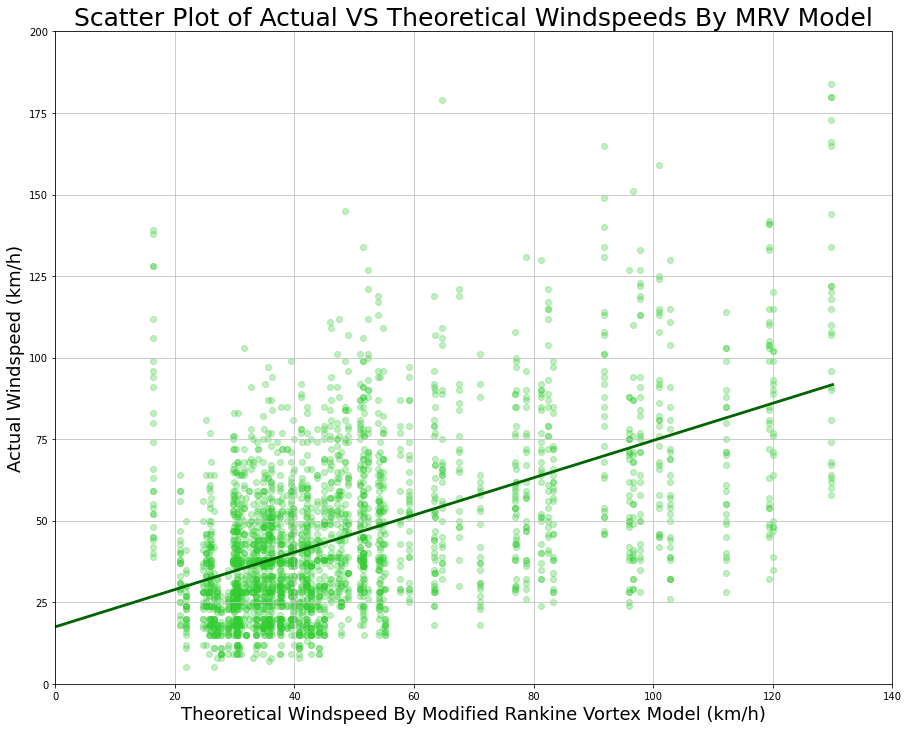

Slope, y Intercept:
0.5711252269397377 17.480972056235053
Correlation Coefficient:
0.5310042116843028


In [24]:
# Draw Scatter Plot of All Actual Windspeeds With Theoretical Windspeed By MRV Model
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(All_MRV_Windspeed_Array, All_Windspeed_Array, c='limegreen', alpha=0.30)
pyplot.title('Scatter Plot of Actual VS Theoretical Windspeeds By MRV Model', fontsize=25)
Axes.set_xlabel('Theoretical Windspeed By Modified Rankine Vortex Model (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, 140)
pyplot.ylim(0, 200)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
All_Windspeed_Actual_MRV_Slope, All_Windspeed_Actual_MRV_Intercept = \
numpy.polyfit(All_MRV_Windspeed_Array_No_Nan, All_Windspeed_Array_No_Nan, 1)
All_Windspeed_Actual_MRV_Best_Fit_x = numpy.arange(numpy.max(All_MRV_Windspeed_Array)+1)
All_Windspeed_Actual_MRV_Best_Fit_Line = All_Windspeed_Actual_MRV_Slope*All_Windspeed_Actual_MRV_Best_Fit_x + \
All_Windspeed_Actual_MRV_Intercept
pyplot.plot(All_Windspeed_Actual_MRV_Best_Fit_x, All_Windspeed_Actual_MRV_Best_Fit_Line, c='darkgreen', linewidth=2.8)
Fig.savefig('Actual_VS_MRV_Theoretical_Windspeed_All_Scatter_Plot.png')
pyplot.show()
print ("Slope, y Intercept:")
print (All_Windspeed_Actual_MRV_Slope, All_Windspeed_Actual_MRV_Intercept)
#
# Find Correlation Coefficient
All_Windspeed_Actual_MRV_Correlation_Matrix = numpy.corrcoef(All_MRV_Windspeed_Array_No_Nan, All_Windspeed_Array_No_Nan)
All_Windspeed_Actual_MRV_Correlation = All_Windspeed_Actual_MRV_Correlation_Matrix[0][1]
print ("Correlation Coefficient:")
print (All_Windspeed_Actual_MRV_Correlation)

In [25]:
# Create 2D Lists of Windspeeds Typhoon Intensities, Distances and R Max of Each Quadrant Corresponding With Each Windspeed Data
Quadrant_Windspeed_List_No_Nan = []
Quadrant_Intensity_List_No_Nan = []
Quadrant_Distance_List_No_Nan = []
Quadrant_R_Max_List_No_Nan = []
for k in range(len(Quadrant_Windspeeds)):
    Quadrant_Windspeed_List_No_Nan.append([])
    Quadrant_Intensity_List_No_Nan.append([])
    Quadrant_Distance_List_No_Nan.append([])
    Quadrant_R_Max_List_No_Nan.append([])
    for i in range(len(Quadrant_Windspeeds[k])):
        for j in range(len(Quadrant_Windspeeds[k][i])):
            if Quadrant_Windspeeds[k][i][j] >= 0:
                Quadrant_Windspeed_List_No_Nan[k].append(Quadrant_Windspeeds[k][i][j])
                Quadrant_Intensity_List_No_Nan[k].append(Quadrant_CPA_Intensity[k][i])
                Quadrant_Distance_List_No_Nan[k].append(Quadrant_CPA_Distance[k][i])
                Quadrant_R_Max_List_No_Nan[k].append(Quadrant_CPA_R_Max[k][i])

In [26]:
# Calculate Theortetical Windspeed of Each Quadrant Under Modified Rankine Vortex Model
B = 0.5
Quadrant_MRV_Windspeed_List_No_Nan = []
for k in range(len(Quadrant_Intensity_List_No_Nan)):
    Quadrant_MRV_Windspeed_List_No_Nan.append([])
    for i in range(len(Quadrant_Intensity_List_No_Nan[k])):
        if Quadrant_R_Max_List_No_Nan[k][i] <= Quadrant_Distance_List_No_Nan[k][i]:
            Quadrant_MRV_Windspeed_List_No_Nan[k].append(Quadrant_Intensity_List_No_Nan[k][i] * \
            (Quadrant_R_Max_List_No_Nan[k][i] / Quadrant_Distance_List_No_Nan[k][i]) ** B)
        else:
            Quadrant_MRV_Windspeed_List_No_Nan[k].append(Quadrant_Intensity_List_No_Nan[k][i] * \
            (Quadrant_Distance_List_No_Nan[k][i] / Quadrant_R_Max_List_No_Nan[k][i]) ** B)

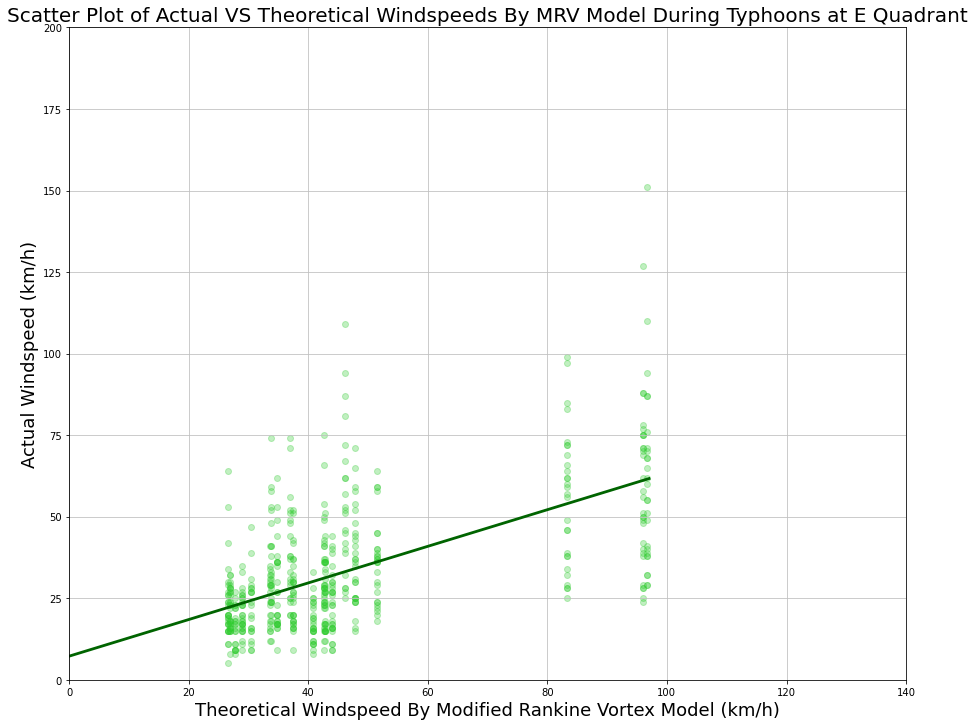

Slope, y Intercept:
0.5613977459285892 7.239941472052756
Correlation Coefficient:
0.5966691163070532


In [27]:
# Draw Scatter Plot of Actual Windspeeds With Theoretical Windspeed By MRV Model During Typhoons Located at Eastern Quadrant
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(Quadrant_MRV_Windspeed_List_No_Nan[0], Quadrant_Windspeed_List_No_Nan[0], c='limegreen', alpha=0.30)
pyplot.title('Scatter Plot of Actual VS Theoretical Windspeeds By MRV Model During Typhoons at E Quadrant', fontsize=20)
Axes.set_xlabel('Theoretical Windspeed By Modified Rankine Vortex Model (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, 140)
pyplot.ylim(0, 200)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
E_Quadrant_Windspeed_Actual_MRV_Slope, E_Quadrant_Windspeed_Actual_MRV_Intercept = \
numpy.polyfit(Quadrant_MRV_Windspeed_List_No_Nan[0], Quadrant_Windspeed_List_No_Nan[0], 1)
E_Quadrant_Windspeed_Actual_MRV_Best_Fit_x = numpy.arange(numpy.max(Quadrant_MRV_Windspeed_List_No_Nan[0])+1)
E_Quadrant_Windspeed_Actual_MRV_Best_Fit_Line = E_Quadrant_Windspeed_Actual_MRV_Slope * \
E_Quadrant_Windspeed_Actual_MRV_Best_Fit_x + E_Quadrant_Windspeed_Actual_MRV_Intercept
pyplot.plot(E_Quadrant_Windspeed_Actual_MRV_Best_Fit_x, E_Quadrant_Windspeed_Actual_MRV_Best_Fit_Line, c='darkgreen', \
linewidth=2.8)
Fig.savefig('Actual_VS_MRV_Theoretical_Windspeed_E_Quadrant_Scatter_Plot.png')
pyplot.show()
print ("Slope, y Intercept:")
print (E_Quadrant_Windspeed_Actual_MRV_Slope, E_Quadrant_Windspeed_Actual_MRV_Intercept)
#
# Find Correlation Coefficient
E_Quadrant_Windspeed_Actual_MRV_Correlation_Matrix = numpy.corrcoef(Quadrant_MRV_Windspeed_List_No_Nan[0], \
Quadrant_Windspeed_List_No_Nan[0])
E_Quadrant_Windspeed_Actual_MRV_Correlation = E_Quadrant_Windspeed_Actual_MRV_Correlation_Matrix[0][1]
print ("Correlation Coefficient:")
print (E_Quadrant_Windspeed_Actual_MRV_Correlation)

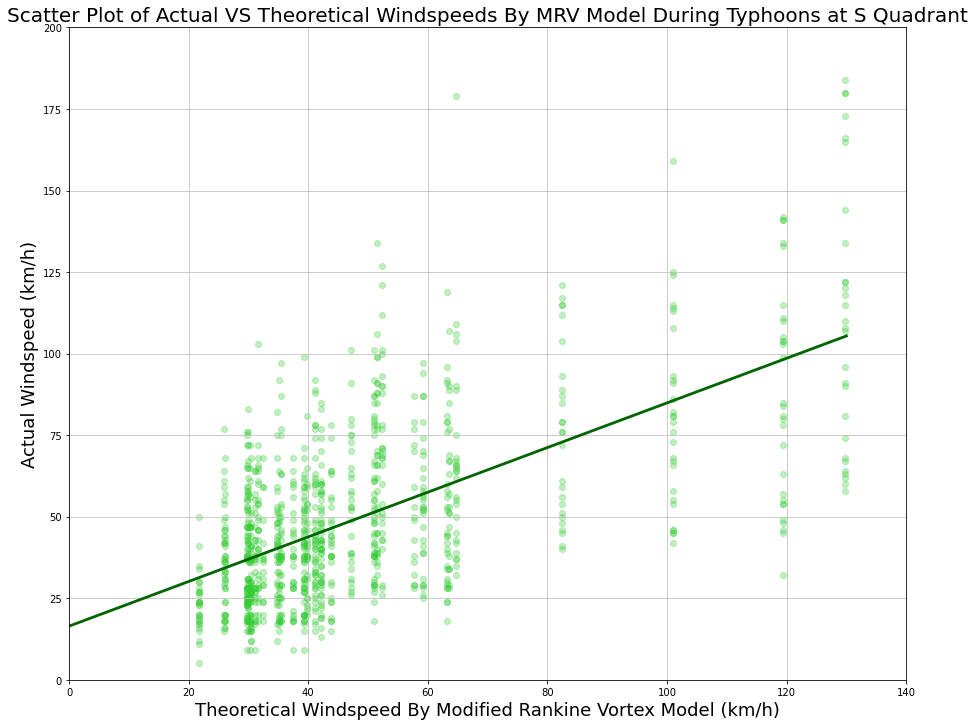

Slope, y Intercept:
0.6843059989131155 16.461228298748498
Correlation Coefficient:
0.617264047086181


In [28]:
# Draw Scatter Plot of Actual Windspeeds With Theoretical Windspeed By MRV Model During Typhoons Located at Southern Quadrant
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(Quadrant_MRV_Windspeed_List_No_Nan[1], Quadrant_Windspeed_List_No_Nan[1], c='limegreen', alpha=0.30)
pyplot.title('Scatter Plot of Actual VS Theoretical Windspeeds By MRV Model During Typhoons at S Quadrant', fontsize=20)
Axes.set_xlabel('Theoretical Windspeed By Modified Rankine Vortex Model (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, 140)
pyplot.ylim(0, 200)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
S_Quadrant_Windspeed_Actual_MRV_Slope, S_Quadrant_Windspeed_Actual_MRV_Intercept = \
numpy.polyfit(Quadrant_MRV_Windspeed_List_No_Nan[1], Quadrant_Windspeed_List_No_Nan[1], 1)
S_Quadrant_Windspeed_Actual_MRV_Best_Fit_x = numpy.arange(numpy.max(Quadrant_MRV_Windspeed_List_No_Nan[1])+1)
S_Quadrant_Windspeed_Actual_MRV_Best_Fit_Line = S_Quadrant_Windspeed_Actual_MRV_Slope * \
S_Quadrant_Windspeed_Actual_MRV_Best_Fit_x + S_Quadrant_Windspeed_Actual_MRV_Intercept
pyplot.plot(S_Quadrant_Windspeed_Actual_MRV_Best_Fit_x, S_Quadrant_Windspeed_Actual_MRV_Best_Fit_Line, c='darkgreen', \
linewidth=2.8)
Fig.savefig('Actual_VS_MRV_Theoretical_Windspeed_S_Quadrant_Scatter_Plot.png')
pyplot.show()
print ("Slope, y Intercept:")
print (S_Quadrant_Windspeed_Actual_MRV_Slope, S_Quadrant_Windspeed_Actual_MRV_Intercept)
#
# Find Correlation Coefficient
S_Quadrant_Windspeed_Actual_MRV_Correlation_Matrix = numpy.corrcoef(Quadrant_MRV_Windspeed_List_No_Nan[1], \
Quadrant_Windspeed_List_No_Nan[1])
S_Quadrant_Windspeed_Actual_MRV_Correlation = S_Quadrant_Windspeed_Actual_MRV_Correlation_Matrix[0][1]
print ("Correlation Coefficient:")
print (S_Quadrant_Windspeed_Actual_MRV_Correlation)

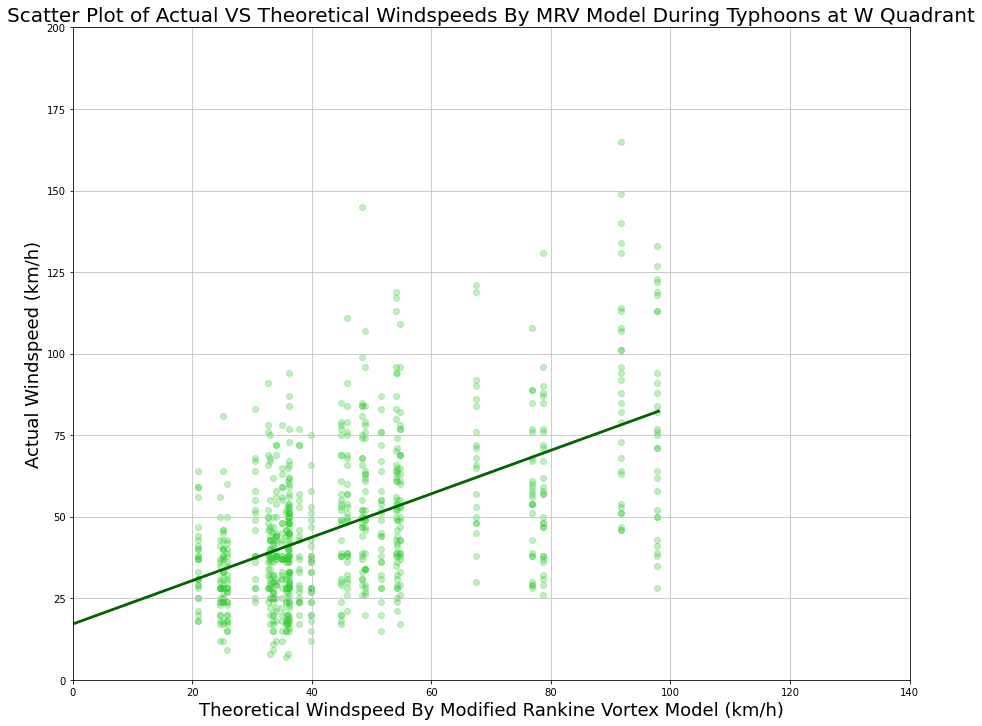

Slope, y Intercept:
0.6659826105067225 17.08536804584175
Correlation Coefficient:
0.5377993357766953


In [29]:
# Draw Scatter Plot of Actual Windspeeds With Theoretical Windspeed By MRV Model During Typhoons Located at Western Quadrant
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(Quadrant_MRV_Windspeed_List_No_Nan[2], Quadrant_Windspeed_List_No_Nan[2], c='limegreen', alpha=0.30)
pyplot.title('Scatter Plot of Actual VS Theoretical Windspeeds By MRV Model During Typhoons at W Quadrant', fontsize=20)
Axes.set_xlabel('Theoretical Windspeed By Modified Rankine Vortex Model (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, 140)
pyplot.ylim(0, 200)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
W_Quadrant_Windspeed_Actual_MRV_Slope, W_Quadrant_Windspeed_Actual_MRV_Intercept = \
numpy.polyfit(Quadrant_MRV_Windspeed_List_No_Nan[2], Quadrant_Windspeed_List_No_Nan[2], 1)
W_Quadrant_Windspeed_Actual_MRV_Best_Fit_x = numpy.arange(numpy.max(Quadrant_MRV_Windspeed_List_No_Nan[2])+1)
W_Quadrant_Windspeed_Actual_MRV_Best_Fit_Line = W_Quadrant_Windspeed_Actual_MRV_Slope * \
W_Quadrant_Windspeed_Actual_MRV_Best_Fit_x + W_Quadrant_Windspeed_Actual_MRV_Intercept
pyplot.plot(W_Quadrant_Windspeed_Actual_MRV_Best_Fit_x, W_Quadrant_Windspeed_Actual_MRV_Best_Fit_Line, c='darkgreen', \
linewidth=2.8)
Fig.savefig('Actual_VS_MRV_Theoretical_Windspeed_W_Quadrant_Scatter_Plot.png')
pyplot.show()
print ("Slope, y Intercept:")
print (W_Quadrant_Windspeed_Actual_MRV_Slope, W_Quadrant_Windspeed_Actual_MRV_Intercept)
#
# Find Correlation Coefficient
W_Quadrant_Windspeed_Actual_MRV_Correlation_Matrix = numpy.corrcoef(Quadrant_MRV_Windspeed_List_No_Nan[2], \
Quadrant_Windspeed_List_No_Nan[2])
W_Quadrant_Windspeed_Actual_MRV_Correlation = W_Quadrant_Windspeed_Actual_MRV_Correlation_Matrix[0][1]
print ("Correlation Coefficient:")
print (W_Quadrant_Windspeed_Actual_MRV_Correlation)

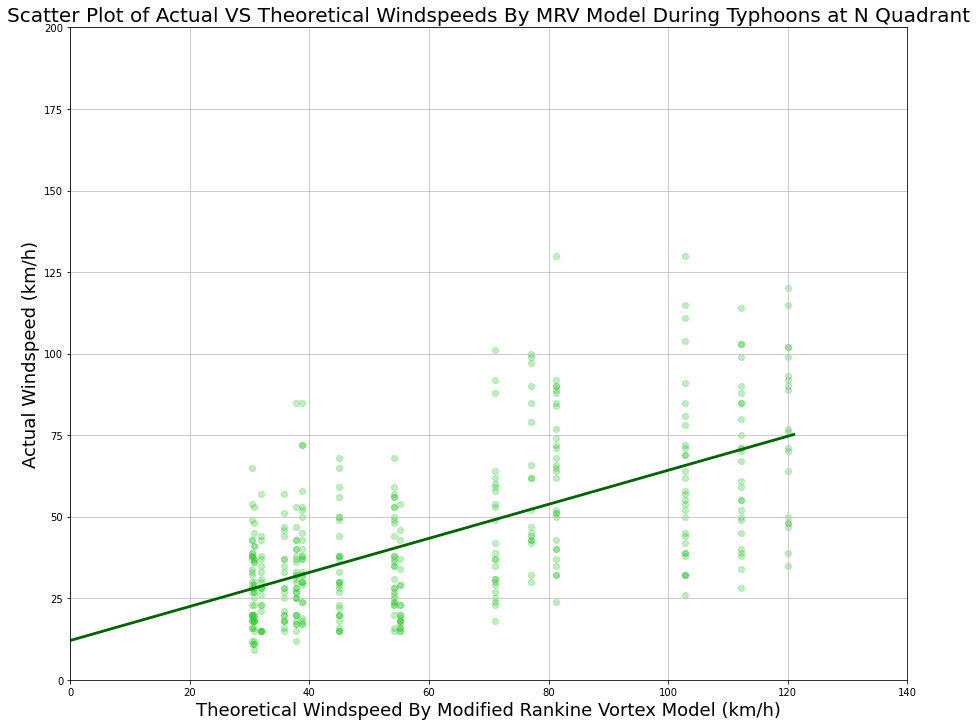

Slope, y Intercept:
0.5218528279448628 12.056949186059791
Correlation Coefficient:
0.6275633638357581


In [30]:
# Draw Scatter Plot of Actual Windspeeds With Theoretical Windspeed By MRV Model During Typhoons Located at Northern Quadrant
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(Quadrant_MRV_Windspeed_List_No_Nan[3], Quadrant_Windspeed_List_No_Nan[3], c='limegreen', alpha=0.30)
pyplot.title('Scatter Plot of Actual VS Theoretical Windspeeds By MRV Model During Typhoons at N Quadrant', fontsize=20)
Axes.set_xlabel('Theoretical Windspeed By Modified Rankine Vortex Model (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, 140)
pyplot.ylim(0, 200)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
N_Quadrant_Windspeed_Actual_MRV_Slope, N_Quadrant_Windspeed_Actual_MRV_Intercept = \
numpy.polyfit(Quadrant_MRV_Windspeed_List_No_Nan[3], Quadrant_Windspeed_List_No_Nan[3], 1)
N_Quadrant_Windspeed_Actual_MRV_Best_Fit_x = numpy.arange(numpy.max(Quadrant_MRV_Windspeed_List_No_Nan[3])+1)
N_Quadrant_Windspeed_Actual_MRV_Best_Fit_Line = N_Quadrant_Windspeed_Actual_MRV_Slope * \
N_Quadrant_Windspeed_Actual_MRV_Best_Fit_x + N_Quadrant_Windspeed_Actual_MRV_Intercept
pyplot.plot(N_Quadrant_Windspeed_Actual_MRV_Best_Fit_x, N_Quadrant_Windspeed_Actual_MRV_Best_Fit_Line, c='darkgreen', \
linewidth=2.8)
Fig.savefig('Actual_VS_MRV_Theoretical_Windspeed_N_Quadrant_Scatter_Plot.png')
pyplot.show()
print ("Slope, y Intercept:")
print (N_Quadrant_Windspeed_Actual_MRV_Slope, N_Quadrant_Windspeed_Actual_MRV_Intercept)
#
# Find Correlation Coefficient
N_Quadrant_Windspeed_Actual_MRV_Correlation_Matrix = numpy.corrcoef(Quadrant_MRV_Windspeed_List_No_Nan[3], \
Quadrant_Windspeed_List_No_Nan[3])
N_Quadrant_Windspeed_Actual_MRV_Correlation = N_Quadrant_Windspeed_Actual_MRV_Correlation_Matrix[0][1]
print ("Correlation Coefficient:")
print (N_Quadrant_Windspeed_Actual_MRV_Correlation)

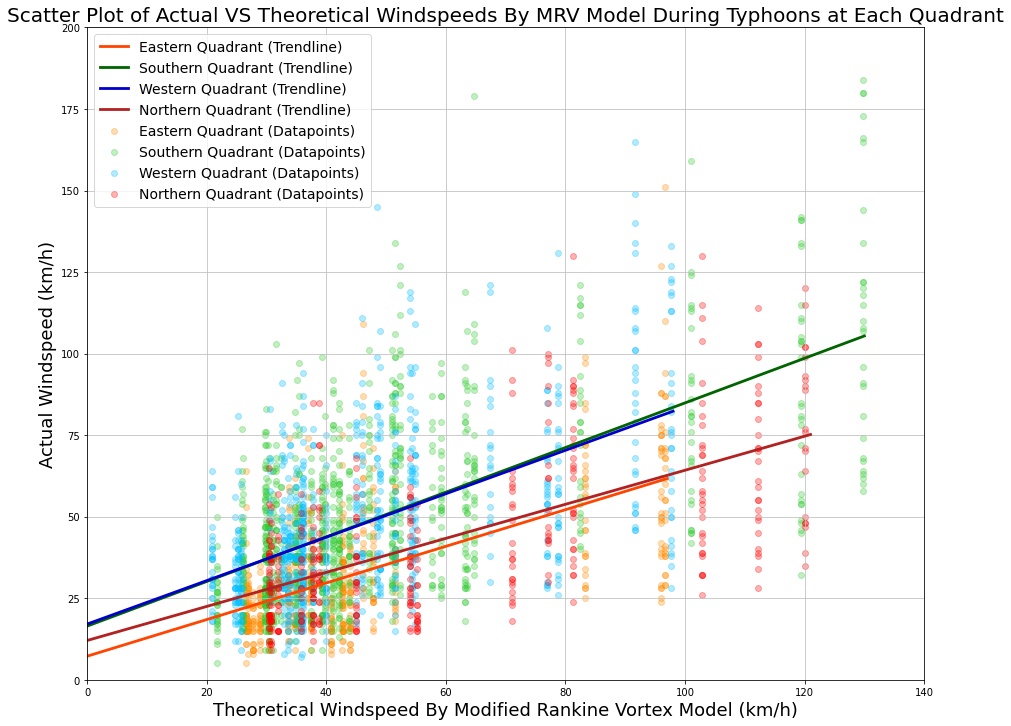

In [31]:
# Draw Scatter Plot of Actual Windspeeds With Theoretical Windspeed By MRV Model During Typhoons Located at Each Quadrant
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(Quadrant_MRV_Windspeed_List_No_Nan[0], Quadrant_Windspeed_List_No_Nan[0], c='darkorange', alpha=0.30, \
label = 'Eastern Quadrant (Datapoints)')
pyplot.scatter(Quadrant_MRV_Windspeed_List_No_Nan[1], Quadrant_Windspeed_List_No_Nan[1], c='limegreen', alpha=0.30, \
label = 'Southern Quadrant (Datapoints)')
pyplot.scatter(Quadrant_MRV_Windspeed_List_No_Nan[2], Quadrant_Windspeed_List_No_Nan[2], c='deepskyblue', alpha=0.30, \
label = 'Western Quadrant (Datapoints)')
pyplot.scatter(Quadrant_MRV_Windspeed_List_No_Nan[3], Quadrant_Windspeed_List_No_Nan[3], c='red', alpha=0.30, \
label = 'Northern Quadrant (Datapoints)')
pyplot.title('Scatter Plot of Actual VS Theoretical Windspeeds By MRV Model During Typhoons at Each Quadrant', fontsize=20)
Axes.set_xlabel('Theoretical Windspeed By Modified Rankine Vortex Model (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, 140)
pyplot.ylim(0, 200)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fits
pyplot.plot(E_Quadrant_Windspeed_Actual_MRV_Best_Fit_x, E_Quadrant_Windspeed_Actual_MRV_Best_Fit_Line, c='orangered', \
linewidth=2.8, label = 'Eastern Quadrant (Trendline)')
pyplot.plot(S_Quadrant_Windspeed_Actual_MRV_Best_Fit_x, S_Quadrant_Windspeed_Actual_MRV_Best_Fit_Line, c='darkgreen', \
linewidth=2.8, label = 'Southern Quadrant (Trendline)')
pyplot.plot(W_Quadrant_Windspeed_Actual_MRV_Best_Fit_x, W_Quadrant_Windspeed_Actual_MRV_Best_Fit_Line, c='mediumblue', \
linewidth=2.8, label = 'Western Quadrant (Trendline)')
pyplot.plot(N_Quadrant_Windspeed_Actual_MRV_Best_Fit_x, N_Quadrant_Windspeed_Actual_MRV_Best_Fit_Line, c='firebrick', \
linewidth=2.8, label = 'Northern Quadrant (Trendline)')
pyplot.legend(loc=2, fontsize=14)
Fig.savefig('Actual_VS_MRV_Theoretical_Windspeed_Quadrants_Scatter_Plot.png')
pyplot.show()

In [32]:
# Input Windspeed Ratio To Average of Hong Kong Data Into 2D Array
Windspeed_Stations_Ratio_To_HK_Ave = numpy.zeros((len(Windspeed_Ratio_File),len(Windspeed_Stations_List)-2))
for k in range(len(Windspeed_Stations_Ratio_To_HK_Ave)):
    for j in range(len(Windspeed_Stations_Ratio_To_HK_Ave[k])):
        Windspeed_Stations_Ratio_To_HK_Ave[k][j] = Windspeed_Ratio_File.iloc[k,j+1]
print (Windspeed_Stations_Ratio_To_HK_Ave)

[[0.98231721 1.02001754 1.33129372 1.41038085 1.33794826 1.09285964
  0.87918289 0.6642764  0.98145768 1.80938643 0.97577152 1.20743352
  0.51661959 0.92942844 1.17170389 0.92216066 0.57659807 0.63732476
  1.00092067 0.58079161 1.25460482 1.78965294 0.92741197 1.46866878
  0.4824965  0.68720912 0.6166744  1.45659124 0.56615285 0.72266405]
 [1.0322033  1.01539219 1.37051394 1.32082378 1.32790719 1.12440631
  0.9076855  0.68204123 0.91734136 1.99588568 0.92926023 1.1756371
  0.47459897 0.99410106 1.11690946 0.86929534 0.5530965  0.71730607
  0.98905548 0.57231005 1.19322555 1.70304593 0.90276369 1.46736666
  0.49521798 0.68018433 0.6273527  1.52053489 0.574582   0.74995551]
 [1.03140045 0.92725955 1.39898593 1.31225164 1.44122538 1.12391545
  0.87642266 0.67475833 0.95814829 1.78807778 0.92120787 1.05332668
  0.42726499 1.05705187 1.2901085  0.81919332 0.62267386 0.65094279
  0.86090319 0.56418132 1.21192952 1.74102481 0.8569889  1.65074081
  0.52387483 0.71532673 0.64405932 1.60056162 0

In [33]:
# Create 3D Lists of Windspeeds Typhoon Intensities, Distances and R Max of Each Quadrant Corresponding With Each Windspeed Data
# Ignore Windspeed Stations With Less Than 30 Data Points: Lamma Island (Index 8) and Tap Mun East (Index 24)
Quadrant_Windspeed_Ratio_List = []
Quadrant_Intensity_Ratio_List = []
Quadrant_Distance_Ratio_List = []
Quadrant_R_Max_Ratio_List = []
Quadrant_Stations_Ratio_List = []
for k in range(len(Quadrant_Windspeeds)):
    Quadrant_Windspeed_Ratio_List.append([])
    Quadrant_Intensity_Ratio_List.append([])
    Quadrant_Distance_Ratio_List.append([])
    Quadrant_R_Max_Ratio_List.append([])
    Quadrant_Stations_Ratio_List.append([])
    for i in range(len(Quadrant_Windspeeds[k])):
        Quadrant_Windspeed_Ratio_List[k].append([])
        Quadrant_Intensity_Ratio_List[k].append([])
        Quadrant_Distance_Ratio_List[k].append([])
        Quadrant_R_Max_Ratio_List[k].append([])
        Quadrant_Stations_Ratio_List[k].append([])
        for j in range(len(Windspeed_Stations_Ratio_To_HK_Ave[k])):
            Quadrant_Intensity_Ratio_List[k][i].append(Quadrant_CPA_Intensity[k][i])
            Quadrant_Distance_Ratio_List[k][i].append(Quadrant_CPA_Distance[k][i])
            Quadrant_R_Max_Ratio_List[k][i].append(Quadrant_CPA_R_Max[k][i])
            Quadrant_Stations_Ratio_List[k][i].append(Windspeed_Stations_Ratio_To_HK_Ave[k][j])
            if j < 8:
                Quadrant_Windspeed_Ratio_List[k][i].append(Quadrant_Windspeeds[k][i][j])
            if j >= 8 and j < 23:
                Quadrant_Windspeed_Ratio_List[k][i].append(Quadrant_Windspeeds[k][i][j+1])
            if j >= 23:
                Quadrant_Windspeed_Ratio_List[k][i].append(Quadrant_Windspeeds[k][i][j+2])

In [34]:
# Calculate Theortetical Windspeed of Each Quadrant Under Modified Rankine Vortex Model With Windspeed Ratios To HK Average
B = 0.5
Quadrant_MRV_Windspeed_Ratio_List = []
for k in range(len(Quadrant_Intensity_Ratio_List)):
    Quadrant_MRV_Windspeed_Ratio_List.append([])
    for i in range(len(Quadrant_Intensity_Ratio_List[k])):
        Quadrant_MRV_Windspeed_Ratio_List[k].append([])
        for j in range(len(Quadrant_Intensity_Ratio_List[k][i])):
            if Quadrant_R_Max_Ratio_List[k][i] <= Quadrant_Distance_Ratio_List[k][i]:
                Quadrant_MRV_Windspeed_Ratio_List[k][i].append((Quadrant_Intensity_Ratio_List[k][i][j] * \
                (Quadrant_R_Max_Ratio_List[k][i][j] / Quadrant_Distance_Ratio_List[k][i][j]) ** B) * \
                Quadrant_Stations_Ratio_List[k][i][j])
            else:
                Quadrant_MRV_Windspeed_Ratio_List[k][i].append((Quadrant_Intensity_Ratio_List[k][i][j] * \
                (Quadrant_Distance_Ratio_List[k][i][j] / Quadrant_R_Max_Ratio_List[k][i][j]) ** B) * \
                Quadrant_Stations_Ratio_List[k][i][j])
#
# Change 3D List Into 2D List and Remove NaN
Quadrant_MRV_Windspeed_Ratio_List_No_Nan = []
Quadrant_Windspeed_Ratio_List_No_Nan = []
for k in range(len(Quadrant_MRV_Windspeed_Ratio_List)):
    Quadrant_MRV_Windspeed_Ratio_List_No_Nan.append([])
    Quadrant_Windspeed_Ratio_List_No_Nan.append([])
    for i in range(len(Quadrant_MRV_Windspeed_Ratio_List[k])):
        for j in range(len(Quadrant_MRV_Windspeed_Ratio_List[k][i])):
            if Quadrant_Windspeed_Ratio_List[k][i][j]>= 0:
                Quadrant_MRV_Windspeed_Ratio_List_No_Nan[k].append(Quadrant_MRV_Windspeed_Ratio_List[k][i][j])
                Quadrant_Windspeed_Ratio_List_No_Nan[k].append(Quadrant_Windspeed_Ratio_List[k][i][j])
#
# Change 2D List Into 1D List For All Windspeeds
All_MRV_Windspeed_Ratio_List_No_Nan = []
All_Windspeed_Ratio_List_No_Nan = []
for k in range(len(Quadrant_MRV_Windspeed_Ratio_List_No_Nan)):
    for i in range(len(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[k])):
        All_MRV_Windspeed_Ratio_List_No_Nan.append(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[k][i])
        All_Windspeed_Ratio_List_No_Nan.append(Quadrant_Windspeed_Ratio_List_No_Nan[k][i])
print (All_MRV_Windspeed_Ratio_List_No_Nan)
print (All_Windspeed_Ratio_List_No_Nan)

[41.935856691964666, 43.54531231891567, 56.83392539699706, 60.21021390217535, 57.118012510742574, 46.654995968645686, 37.532975443516335, 28.358456497716894, 41.89916309434213, 41.65641641240876, 51.546240456842554, 22.05487676194436, 39.67799557108818, 50.020916189440555, 39.3677285603534, 24.615403350763362, 27.207871076533664, 42.73005254995169, 24.794428416555213, 53.56001876671607, 76.4016232441712, 39.59191124210958, 62.69856928969327, 20.598136483335573, 29.33747171846719, 26.32629146765242, 62.18297015663266, 24.16948894609293, 30.851069187367695, 81.85041120969511, 84.99174693719294, 110.92846388176186, 117.51830427875943, 111.48294515181783, 91.0612279384297, 73.2568669466062, 55.35003952965945, 81.77879264050196, 150.76496893429314, 81.30499963128837, 100.60795964411057, 43.04671168170483, 77.44351754455307, 97.63083151645502, 48.04434785133507, 83.40052280118502, 48.39376900086684, 104.53845244312605, 149.12069939474605, 77.2754981386932, 122.37507668716066, 40.203445793382

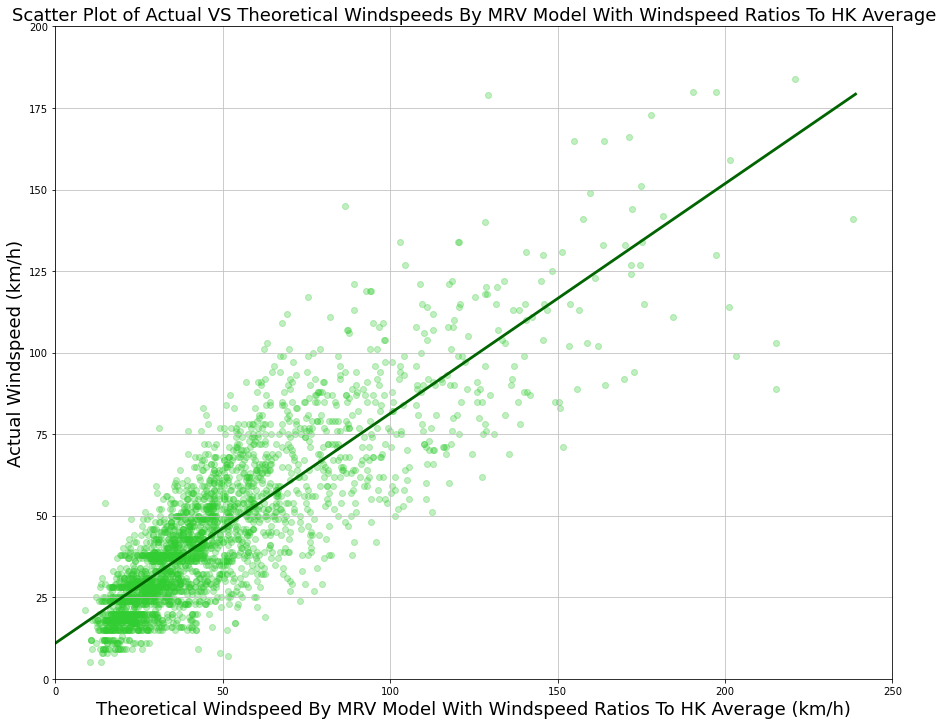

Slope, y Intercept:
0.704364711475447 10.918211703284467
Correlation Coefficient:
0.8443552964786116


In [35]:
# Draw Scatter Plot of All Actual Windspeeds With Theoretical Windspeed By MRV Model With Windspeed Ratios To HK Average
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(All_MRV_Windspeed_Ratio_List_No_Nan, All_Windspeed_Ratio_List_No_Nan, c='limegreen', alpha=0.30)
pyplot.title('Scatter Plot of Actual VS Theoretical Windspeeds By MRV Model With Windspeed Ratios To HK Average', fontsize=18)
Axes.set_xlabel('Theoretical Windspeed By MRV Model With Windspeed Ratios To HK Average (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, 250)
pyplot.ylim(0, 200)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
All_Windspeed_Actual_MRV_Ratio_Slope, All_Windspeed_Actual_MRV_Ratio_Intercept = \
numpy.polyfit(All_MRV_Windspeed_Ratio_List_No_Nan, All_Windspeed_Ratio_List_No_Nan, 1)
All_Windspeed_Actual_MRV_Ratio_Best_Fit_x = numpy.arange(numpy.max(All_MRV_Windspeed_Ratio_List_No_Nan)+1)
All_Windspeed_Actual_MRV_Ratio_Best_Fit_Line = All_Windspeed_Actual_MRV_Ratio_Slope*All_Windspeed_Actual_MRV_Ratio_Best_Fit_x + \
All_Windspeed_Actual_MRV_Ratio_Intercept
pyplot.plot(All_Windspeed_Actual_MRV_Ratio_Best_Fit_x, All_Windspeed_Actual_MRV_Ratio_Best_Fit_Line, \
c='darkgreen', linewidth=2.8)
Fig.savefig('Actual_VS_MRV_Theoretical_Windspeed_With_Ratios_All_Scatter_Plot.png')
pyplot.show()
print ("Slope, y Intercept:")
print (All_Windspeed_Actual_MRV_Ratio_Slope, All_Windspeed_Actual_MRV_Ratio_Intercept)
#
# Find Correlation Coefficient
All_Windspeed_Actual_MRV_Ratio_Correlation_Matrix = numpy.corrcoef(All_MRV_Windspeed_Ratio_List_No_Nan, All_Windspeed_Ratio_List_No_Nan)
All_Windspeed_Actual_MRV_Ratio_Correlation = All_Windspeed_Actual_MRV_Ratio_Correlation_Matrix[0][1]
print ("Correlation Coefficient:")
print (All_Windspeed_Actual_MRV_Ratio_Correlation)

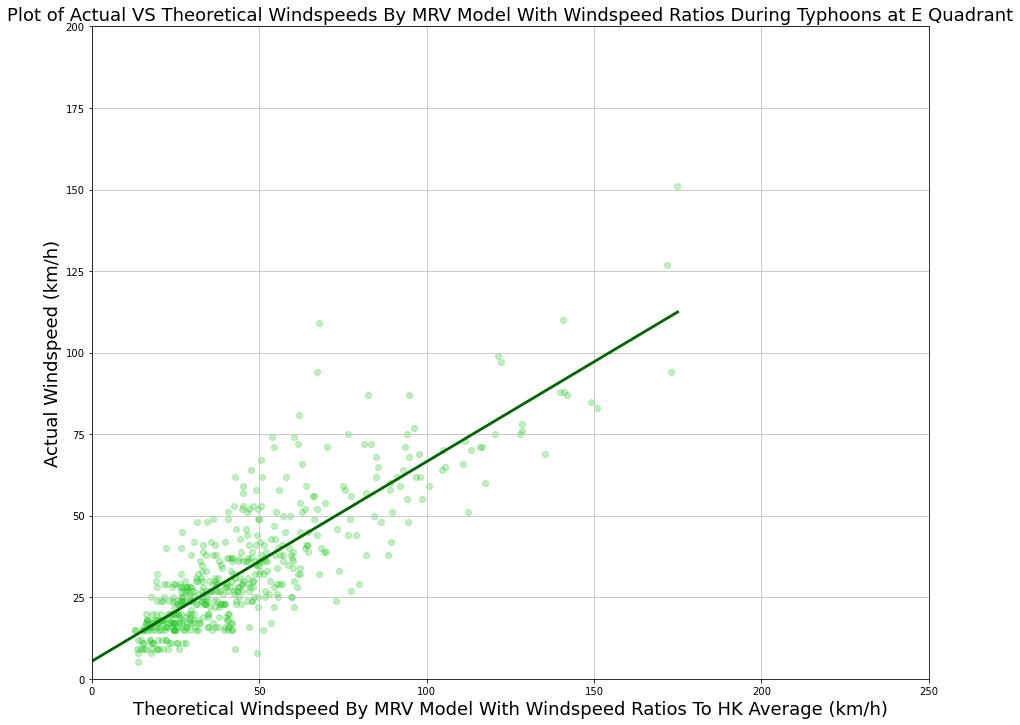

Slope, y Intercept:
0.61200960768503 5.374314295199189
Correlation Coefficient:
0.8433471134770506


In [36]:
# Draw Scatter Plot of Actual Windspeeds With Theoretical Windspeed By MRV Model With Windspeed Ratios To HK Average During Typhoons Located at Eastern Quadrant
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[0], Quadrant_Windspeed_Ratio_List_No_Nan[0], c='limegreen', alpha=0.30)
pyplot.title('Plot of Actual VS Theoretical Windspeeds By MRV Model With Windspeed Ratios During Typhoons at E Quadrant', \
fontsize=18)
Axes.set_xlabel('Theoretical Windspeed By MRV Model With Windspeed Ratios To HK Average (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, 250)
pyplot.ylim(0, 200)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
E_Quadrant_Windspeed_Actual_MRV_Ratio_Slope, E_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept = \
numpy.polyfit(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[0], Quadrant_Windspeed_Ratio_List_No_Nan[0], 1)
E_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x = numpy.arange(numpy.max(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[0])+1)
E_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_Line = E_Quadrant_Windspeed_Actual_MRV_Ratio_Slope * \
E_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x + E_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept
pyplot.plot(E_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x, E_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_Line, \
c='darkgreen', linewidth=2.8)
Fig.savefig('Actual_VS_MRV_Theoretical_Windspeed_With_Ratios_E_Quadrant_Scatter_Plot.png')
pyplot.show()
print ("Slope, y Intercept:")
print (E_Quadrant_Windspeed_Actual_MRV_Ratio_Slope, E_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept)
#
# Find Correlation Coefficient
E_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation_Matrix = numpy.corrcoef(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[0], \
Quadrant_Windspeed_Ratio_List_No_Nan[0])
E_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation = E_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation_Matrix[0][1]
print ("Correlation Coefficient:")
print (E_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation)

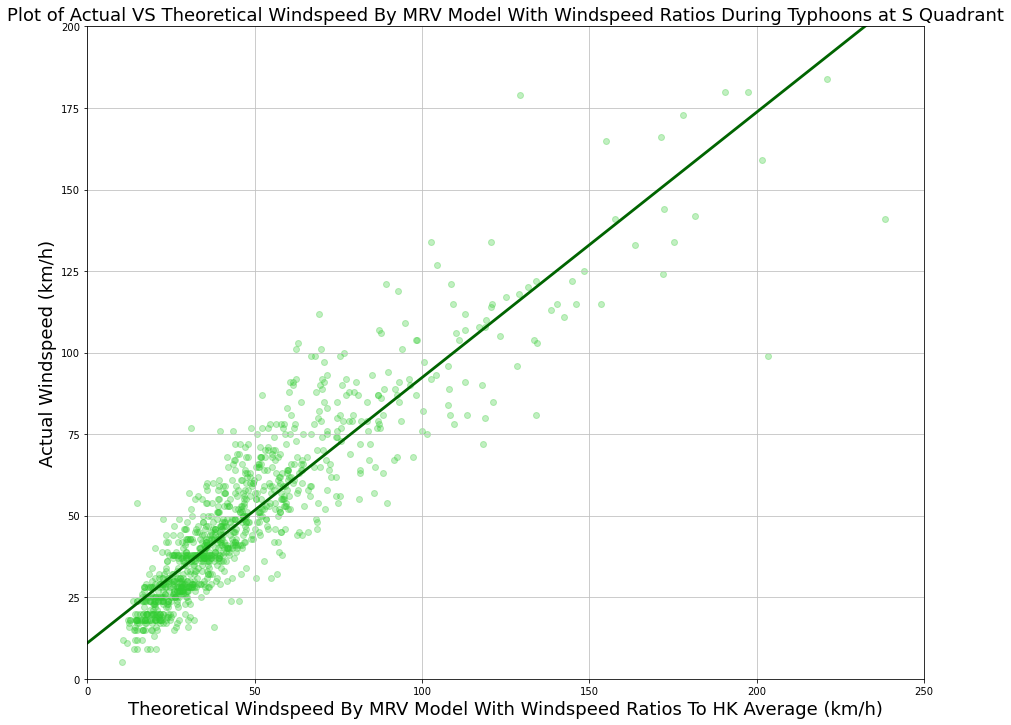

Slope, y Intercept:
0.8140505744308336 10.928003004632155
Correlation Coefficient:
0.9065914459529757


In [37]:
# Draw Scatter Plot of Actual Windspeeds With Theoretical Windspeed By MRV Model With Windspeed Ratios To HK Average During Typhoons Located at Southern Quadrant
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[1], Quadrant_Windspeed_Ratio_List_No_Nan[1], c='limegreen', alpha=0.30)
pyplot.title('Plot of Actual VS Theoretical Windspeed By MRV Model With Windspeed Ratios During Typhoons at S Quadrant', \
fontsize=18)
Axes.set_xlabel('Theoretical Windspeed By MRV Model With Windspeed Ratios To HK Average (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, 250)
pyplot.ylim(0, 200)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
S_Quadrant_Windspeed_Actual_MRV_Ratio_Slope, S_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept = \
numpy.polyfit(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[1], Quadrant_Windspeed_Ratio_List_No_Nan[1], 1)
S_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x = numpy.arange(numpy.max(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[1])+1)
S_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_Line = S_Quadrant_Windspeed_Actual_MRV_Ratio_Slope * \
S_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x + S_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept
pyplot.plot(S_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x, S_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_Line, \
c='darkgreen', linewidth=2.8)
Fig.savefig('Actual_VS_MRV_Theoretical_Windspeed_With_Ratios_S_Quadrant_Scatter_Plot.png')
pyplot.show()
print ("Slope, y Intercept:")
print (S_Quadrant_Windspeed_Actual_MRV_Ratio_Slope, S_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept)
#
# Find Correlation Coefficient
S_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation_Matrix = numpy.corrcoef(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[1], \
Quadrant_Windspeed_Ratio_List_No_Nan[1])
S_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation = S_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation_Matrix[0][1]
print ("Correlation Coefficient:")
print (S_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation)

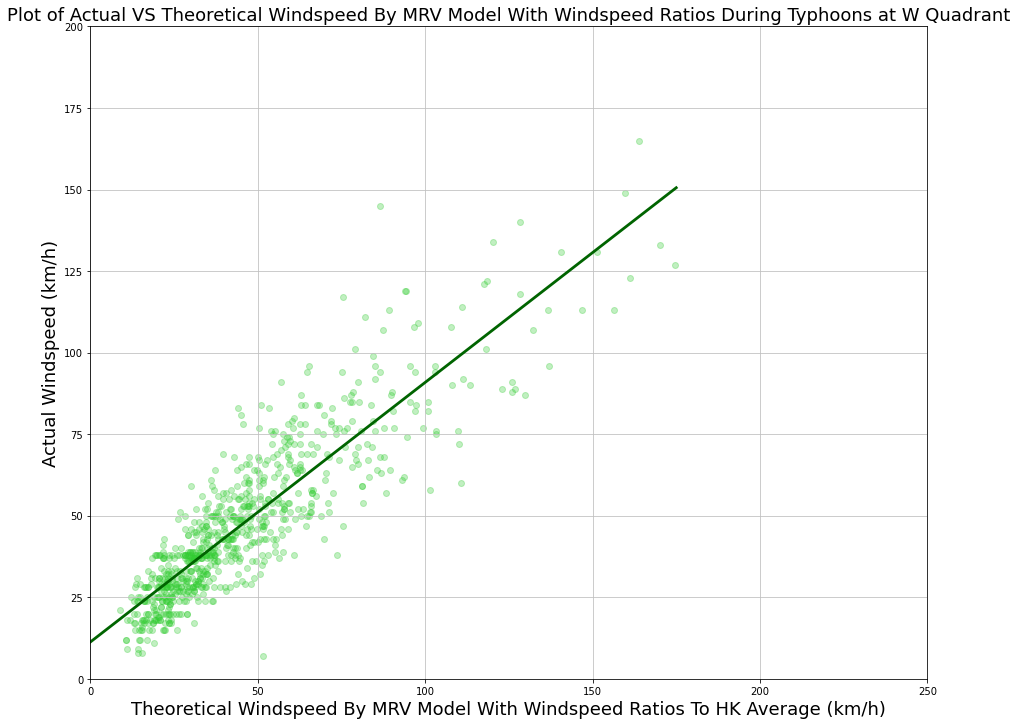

Slope, y Intercept:
0.7959143162120731 11.2737975063176
Correlation Coefficient:
0.883683816076389


In [38]:
# Draw Scatter Plot of Actual Windspeeds With Theoretical Windspeed By MRV Model With Windspeed Ratios To HK Average During Typhoons Located at Western Quadrant
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[2], Quadrant_Windspeed_Ratio_List_No_Nan[2], c='limegreen', alpha=0.30)
pyplot.title('Plot of Actual VS Theoretical Windspeed By MRV Model With Windspeed Ratios During Typhoons at W Quadrant', \
fontsize=18)
Axes.set_xlabel('Theoretical Windspeed By MRV Model With Windspeed Ratios To HK Average (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, 250)
pyplot.ylim(0, 200)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
W_Quadrant_Windspeed_Actual_MRV_Ratio_Slope, W_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept = \
numpy.polyfit(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[2], Quadrant_Windspeed_Ratio_List_No_Nan[2], 1)
W_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x = numpy.arange(numpy.max(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[2])+1)
W_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_Line = W_Quadrant_Windspeed_Actual_MRV_Ratio_Slope * \
W_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x + W_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept
pyplot.plot(W_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x, W_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_Line, \
c='darkgreen', linewidth=2.8)
Fig.savefig('Actual_VS_MRV_Theoretical_Windspeed_With_Ratios_W_Quadrant_Scatter_Plot.png')
pyplot.show()
print ("Slope, y Intercept:")
print (W_Quadrant_Windspeed_Actual_MRV_Ratio_Slope, W_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept)
#
# Find Correlation Coefficient
W_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation_Matrix = numpy.corrcoef(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[2], \
Quadrant_Windspeed_Ratio_List_No_Nan[2])
W_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation = W_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation_Matrix[0][1]
print ("Correlation Coefficient:")
print (W_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation)

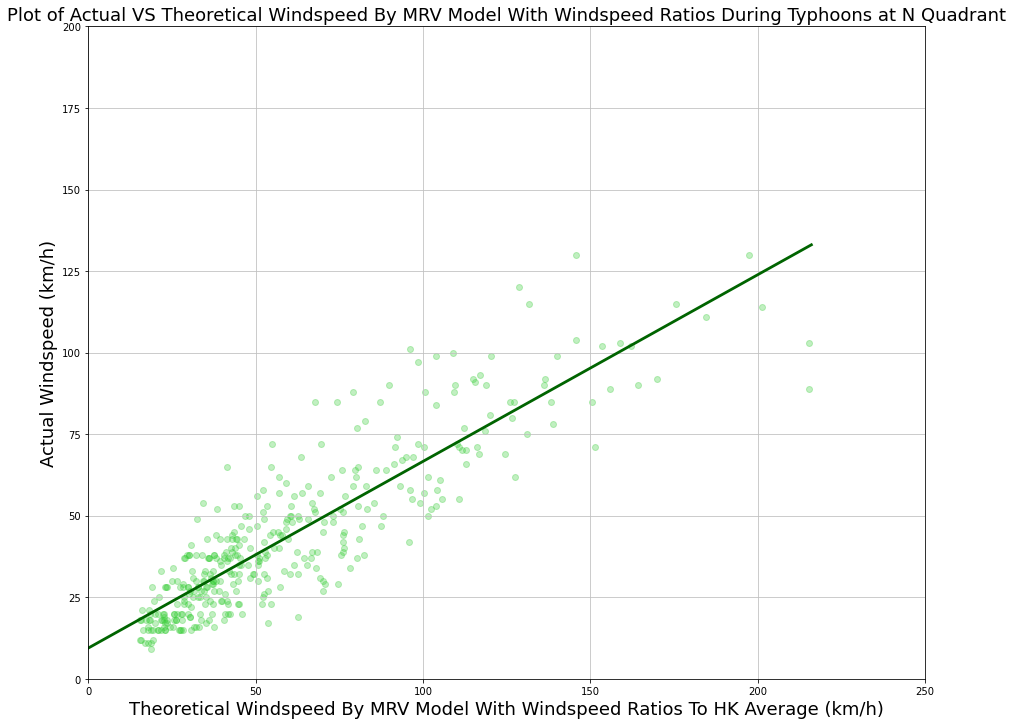

Slope, y Intercept:
0.572496939844472 9.405900934090418
Correlation Coefficient:
0.8814173445922988


In [39]:
# Draw Scatter Plot of Actual Windspeeds With Theoretical Windspeed By MRV Model With Windspeed Ratios To HK Average During Typhoons Located at Northern Quadrant
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[3], Quadrant_Windspeed_Ratio_List_No_Nan[3], c='limegreen', alpha=0.30)
pyplot.title('Plot of Actual VS Theoretical Windspeed By MRV Model With Windspeed Ratios During Typhoons at N Quadrant', \
fontsize=18)
Axes.set_xlabel('Theoretical Windspeed By MRV Model With Windspeed Ratios To HK Average (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, 250)
pyplot.ylim(0, 200)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
N_Quadrant_Windspeed_Actual_MRV_Ratio_Slope, N_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept = \
numpy.polyfit(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[3], Quadrant_Windspeed_Ratio_List_No_Nan[3], 1)
N_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x = numpy.arange(numpy.max(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[3])+1)
N_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_Line = N_Quadrant_Windspeed_Actual_MRV_Ratio_Slope * \
N_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x + N_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept
pyplot.plot(N_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x, N_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_Line, \
c='darkgreen', linewidth=2.8)
Fig.savefig('Actual_VS_MRV_Theoretical_Windspeed_With_Ratios_N_Quadrant_Scatter_Plot.png')
pyplot.show()
print ("Slope, y Intercept:")
print (N_Quadrant_Windspeed_Actual_MRV_Ratio_Slope, N_Quadrant_Windspeed_Actual_MRV_Ratio_Intercept)
#
# Find Correlation Coefficient
N_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation_Matrix = numpy.corrcoef(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[3], \
Quadrant_Windspeed_Ratio_List_No_Nan[3])
N_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation = N_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation_Matrix[0][1]
print ("Correlation Coefficient:")
print (N_Quadrant_Windspeed_Actual_MRV_Ratio_Correlation)

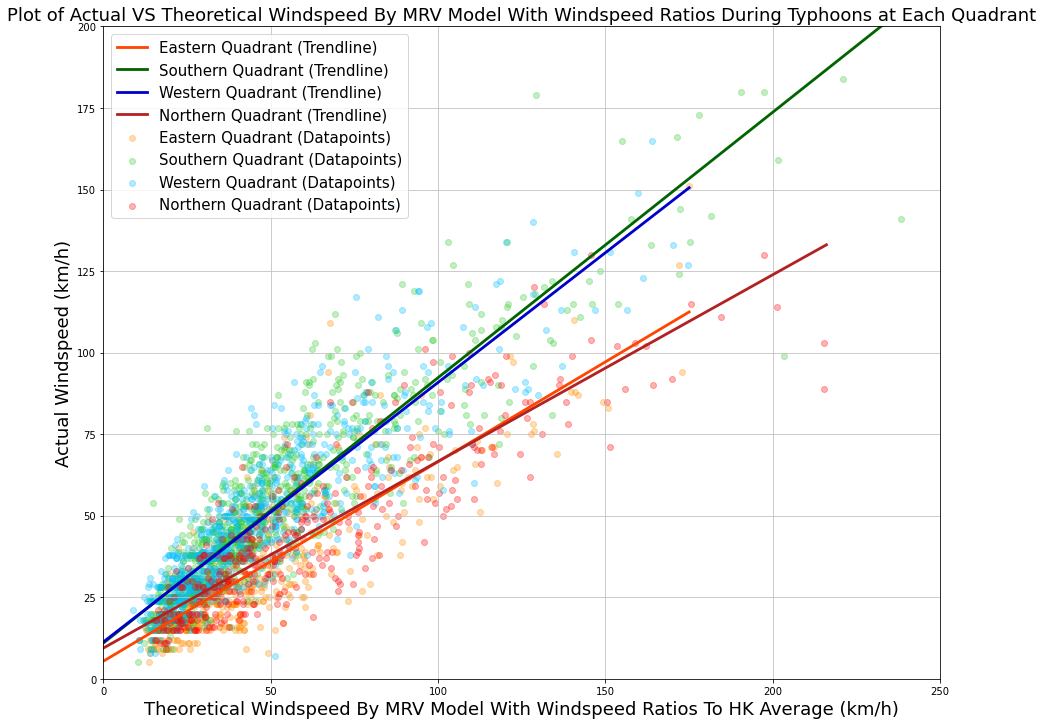

In [40]:
# Draw Scatter Plot of Actual Windspeeds With Theoretical Windspeed By MRV Model With Windspeed Ratios To HK Average During Typhoons Located at Each Quadrant
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[0], Quadrant_Windspeed_Ratio_List_No_Nan[0], c='darkorange', alpha=0.30, \
label = 'Eastern Quadrant (Datapoints)')
pyplot.scatter(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[1], Quadrant_Windspeed_Ratio_List_No_Nan[1], c='limegreen', alpha=0.30, \
label = 'Southern Quadrant (Datapoints)')
pyplot.scatter(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[2], Quadrant_Windspeed_Ratio_List_No_Nan[2], c='deepskyblue', alpha=0.30, \
label = 'Western Quadrant (Datapoints)')
pyplot.scatter(Quadrant_MRV_Windspeed_Ratio_List_No_Nan[3], Quadrant_Windspeed_Ratio_List_No_Nan[3], c='red', alpha=0.30, \
label = 'Northern Quadrant (Datapoints)')
pyplot.title('Plot of Actual VS Theoretical Windspeed By MRV Model With Windspeed Ratios During Typhoons at Each Quadrant', \
fontsize=18)
Axes.set_xlabel('Theoretical Windspeed By MRV Model With Windspeed Ratios To HK Average (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, 250)
pyplot.ylim(0, 200)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fits
pyplot.plot(E_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x, E_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_Line, c='orangered', \
linewidth=2.8, label = 'Eastern Quadrant (Trendline)')
pyplot.plot(S_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x, S_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_Line, c='darkgreen', \
linewidth=2.8, label = 'Southern Quadrant (Trendline)')
pyplot.plot(W_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x, W_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_Line, c='mediumblue', \
linewidth=2.8, label = 'Western Quadrant (Trendline)')
pyplot.plot(N_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_x, N_Quadrant_Windspeed_Actual_MRV_Ratio_Best_Fit_Line, c='firebrick', \
linewidth=2.8, label = 'Northern Quadrant (Trendline)')
pyplot.legend(loc=2, fontsize=15)
Fig.savefig('Actual_VS_MRV_Theoretical_Windspeed_With_Ratios_Quadrants_Scatter_Plot.png')
pyplot.show()

In [41]:
# Calculate Theortetical Windspeed of Each Quadrant Under SLOSH Wind Model With Windspeed Ratios To HK Average
Quadrant_SLOSH_Windspeed_Ratio_List = []
for k in range(len(Quadrant_Intensity_Ratio_List)):
    Quadrant_SLOSH_Windspeed_Ratio_List.append([])
    for i in range(len(Quadrant_Intensity_Ratio_List[k])):
        Quadrant_SLOSH_Windspeed_Ratio_List[k].append([])
        for j in range(len(Quadrant_Intensity_Ratio_List[k][i])):
            Quadrant_SLOSH_Windspeed_Ratio_List[k][i].append(Quadrant_Intensity_Ratio_List[k][i][j] * \
            (2 * Quadrant_R_Max_Ratio_List[k][i][j] * Quadrant_Distance_Ratio_List[k][i][j]) / \
            ((Quadrant_R_Max_Ratio_List[k][i][j] ** 2) + (Quadrant_Distance_Ratio_List[k][i][j] ** 2)) * \
            Quadrant_Stations_Ratio_List[k][i][j])
print (Quadrant_SLOSH_Windspeed_Ratio_List)
#
# Change 3D List Into 2D List and Remove NaN
Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan = []
Quadrant_Windspeed_Ratio_List_No_Nan = []
for k in range(len(Quadrant_SLOSH_Windspeed_Ratio_List)):
    Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan.append([])
    Quadrant_Windspeed_Ratio_List_No_Nan.append([])
    for i in range(len(Quadrant_SLOSH_Windspeed_Ratio_List[k])):
        for j in range(len(Quadrant_SLOSH_Windspeed_Ratio_List[k][i])):
            if Quadrant_Windspeed_Ratio_List[k][i][j]>= 0:
                Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[k].append(Quadrant_SLOSH_Windspeed_Ratio_List[k][i][j])
                Quadrant_Windspeed_Ratio_List_No_Nan[k].append(Quadrant_Windspeed_Ratio_List[k][i][j])
#
# Change 2D List Into 1D List For All Windspeeds
All_SLOSH_Windspeed_Ratio_List_No_Nan = []
All_Windspeed_Ratio_List_No_Nan = []
for k in range(len(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan)):
    for i in range(len(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[k])):
        All_SLOSH_Windspeed_Ratio_List_No_Nan.append(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[k][i])
        All_Windspeed_Ratio_List_No_Nan.append(Quadrant_Windspeed_Ratio_List_No_Nan[k][i])
print (All_SLOSH_Windspeed_Ratio_List_No_Nan)
print (All_Windspeed_Ratio_List_No_Nan)

[[[37.86683815167805, 39.32012897594155, 51.31935351507915, 54.368042166370124, 51.57587577564, 42.128081328797826, 33.89116661930186, 25.606847388817215, 37.83370491840273, 69.74910196787651, 37.614511844939436, 46.54473042113239, 19.914901344075208, 35.82805634590231, 45.16740772597911, 35.54789441274809, 22.226981114713485, 24.567902787216315, 38.58397351953355, 22.38863545365376, 48.36311266841701, 68.98840586859549, 35.750324743165, 56.6149534770207, 18.599507962122928, 26.490869174385843, 23.771862477069934, 56.1493827110253, 21.82433359721583, 27.857602917364968], [87.36844794721483, 90.72156032547142, 118.40682996312478, 125.44093179836808, 118.99869220626587, 97.20022215607138, 78.19556031555393, 59.08152416161023, 87.29200113232253, 160.92895742274567, 86.7862668390985, 107.39055742460096, 45.94875374818293, 82.6644586318103, 104.21272288462671, 82.01805363819742, 51.28331113271246, 56.68441413670086, 89.02306204006888, 51.65628889865564, 111.58602877828685, 159.1738376187770

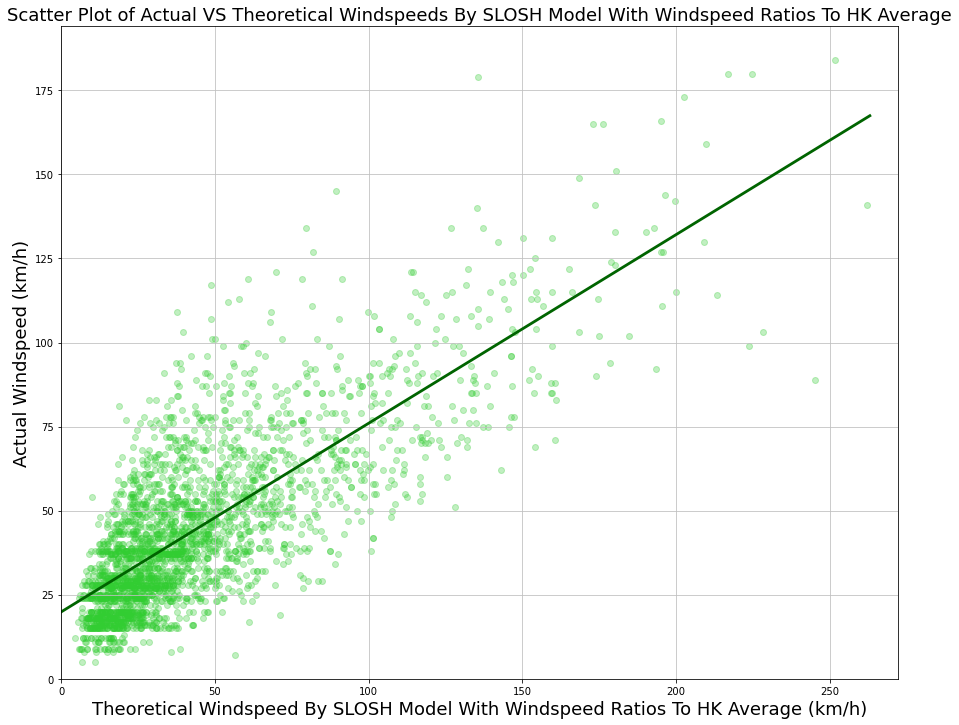

Slope, y Intercept:
0.561141932131877 19.87610137807453
Correlation Coefficient:
0.7761885985135043


In [42]:
# Draw Scatter Plot of All Actual Windspeeds With Theoretical Windspeed By SLOSH Wind Model With Windspeed Ratios To HK Average
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(All_SLOSH_Windspeed_Ratio_List_No_Nan, All_Windspeed_Ratio_List_No_Nan, c='limegreen', alpha=0.30)
pyplot.title('Scatter Plot of Actual VS Theoretical Windspeeds By SLOSH Model With Windspeed Ratios To HK Average', fontsize=18)
Axes.set_xlabel('Theoretical Windspeed By SLOSH Model With Windspeed Ratios To HK Average (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, numpy.max(All_SLOSH_Windspeed_Ratio_List_No_Nan)+10)
pyplot.ylim(0, numpy.max(All_Windspeed_Ratio_List_No_Nan)+10)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
All_Windspeed_Actual_SLOSH_Ratio_Slope, All_Windspeed_Actual_SLOSH_Ratio_Intercept = \
numpy.polyfit(All_SLOSH_Windspeed_Ratio_List_No_Nan, All_Windspeed_Ratio_List_No_Nan, 1)
All_Windspeed_Actual_SLOSH_Ratio_Best_Fit_x = numpy.arange(numpy.max(All_SLOSH_Windspeed_Ratio_List_No_Nan)+1)
All_Windspeed_Actual_SLOSH_Ratio_Best_Fit_Line = All_Windspeed_Actual_SLOSH_Ratio_Slope*All_Windspeed_Actual_SLOSH_Ratio_Best_Fit_x + \
All_Windspeed_Actual_SLOSH_Ratio_Intercept
pyplot.plot(All_Windspeed_Actual_SLOSH_Ratio_Best_Fit_x, All_Windspeed_Actual_SLOSH_Ratio_Best_Fit_Line, \
c='darkgreen', linewidth=2.8)
Fig.savefig('Actual_VS_SLOSH_Theoretical_Windspeed_With_Ratios_All_Scatter_Plot.png')
pyplot.show()
print ("Slope, y Intercept:")
print (All_Windspeed_Actual_SLOSH_Ratio_Slope, All_Windspeed_Actual_SLOSH_Ratio_Intercept)
#
# Find Correlation Coefficient
All_Windspeed_Actual_SLOSH_Ratio_Correlation_Matrix = numpy.corrcoef(All_SLOSH_Windspeed_Ratio_List_No_Nan, All_Windspeed_Ratio_List_No_Nan)
All_Windspeed_Actual_SLOSH_Ratio_Correlation = All_Windspeed_Actual_SLOSH_Ratio_Correlation_Matrix[0][1]
print ("Correlation Coefficient:")
print (All_Windspeed_Actual_SLOSH_Ratio_Correlation)

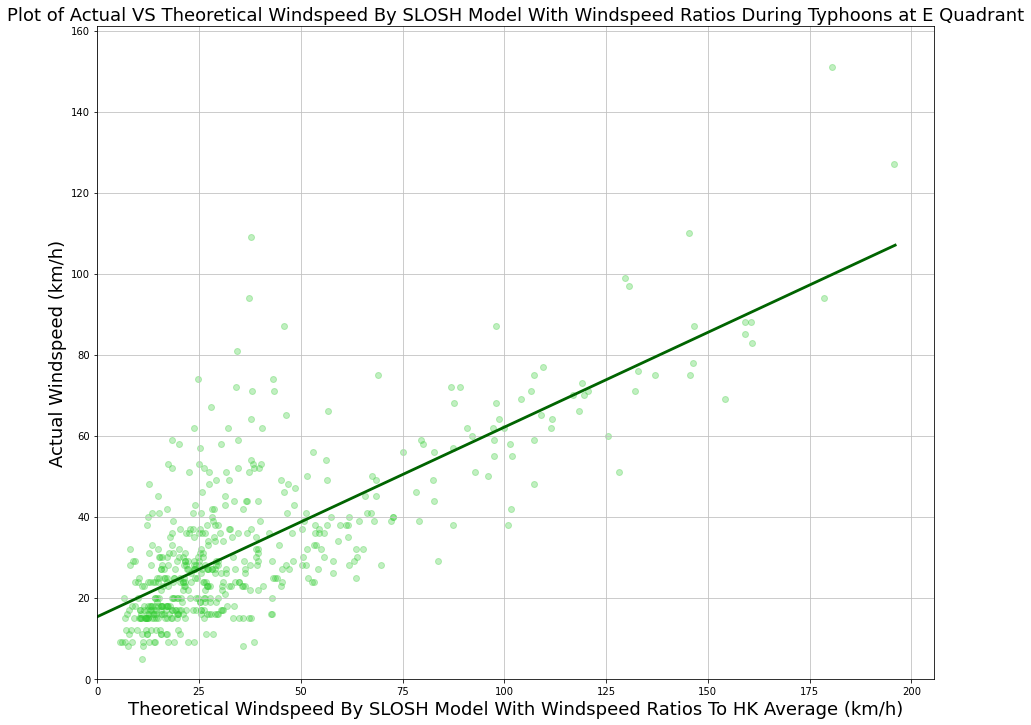

Slope, y Intercept:
0.467874321068422 15.322420662049247
Correlation Coefficient:
0.7631602094606711


In [43]:
# Draw Scatter Plot of Actual Windspeeds With Theoretical Windspeed By SLOSH Model With Windspeed Ratios To HK Average During Typhoons Located at Eastern Quadrant
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[0], Quadrant_Windspeed_Ratio_List_No_Nan[0], c='limegreen', alpha=0.30)
pyplot.title('Plot of Actual VS Theoretical Windspeed By SLOSH Model With Windspeed Ratios During Typhoons at E Quadrant', \
fontsize=18)
Axes.set_xlabel('Theoretical Windspeed By SLOSH Model With Windspeed Ratios To HK Average (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, numpy.max(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[0])+10)
pyplot.ylim(0, numpy.max(Quadrant_Windspeed_Ratio_List_No_Nan[0])+10)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
E_Quadrant_Windspeed_Actual_SLOSH_Ratio_Slope, E_Quadrant_Windspeed_Actual_SLOSH_Ratio_Intercept = \
numpy.polyfit(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[0], Quadrant_Windspeed_Ratio_List_No_Nan[0], 1)
E_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_x = numpy.arange(numpy.max(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[0])+1)
E_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_Line = E_Quadrant_Windspeed_Actual_SLOSH_Ratio_Slope * \
E_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_x + E_Quadrant_Windspeed_Actual_SLOSH_Ratio_Intercept
pyplot.plot(E_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_x, E_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_Line, \
c='darkgreen', linewidth=2.8)
Fig.savefig('Actual_VS_SLOSH_Theoretical_Windspeed_With_Ratios_E_Quadrant_Scatter_Plot.png')
pyplot.show()
print ("Slope, y Intercept:")
print (E_Quadrant_Windspeed_Actual_SLOSH_Ratio_Slope, E_Quadrant_Windspeed_Actual_SLOSH_Ratio_Intercept)
#
# Find Correlation Coefficient
E_Quadrant_Windspeed_Actual_SLOSH_Ratio_Correlation_Matrix = numpy.corrcoef(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[0], \
Quadrant_Windspeed_Ratio_List_No_Nan[0])
E_Quadrant_Windspeed_Actual_SLOSH_Ratio_Correlation = E_Quadrant_Windspeed_Actual_SLOSH_Ratio_Correlation_Matrix[0][1]
print ("Correlation Coefficient:")
print (E_Quadrant_Windspeed_Actual_SLOSH_Ratio_Correlation)

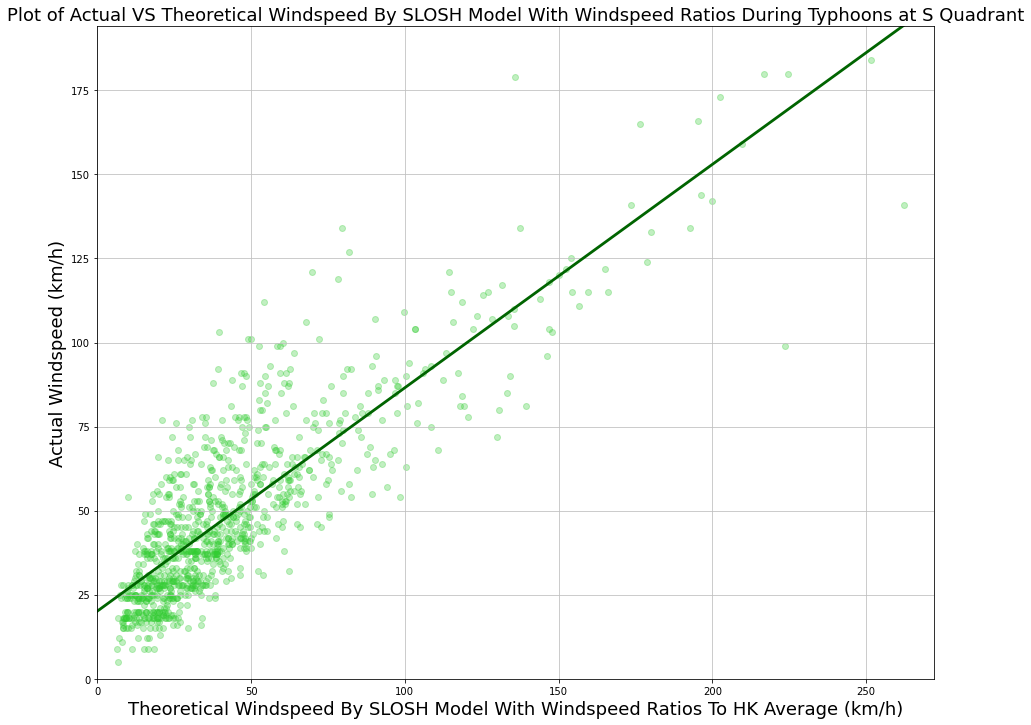

Slope, y Intercept:
0.6643028677726661 20.130470480132022
Correlation Coefficient:
0.8445631460503953


In [44]:
# Draw Scatter Plot of Actual Windspeeds With Theoretical Windspeed By SLOSH Model With Windspeed Ratios To HK Average During Typhoons Located at Southern Quadrant
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[1], Quadrant_Windspeed_Ratio_List_No_Nan[1], c='limegreen', alpha=0.30)
pyplot.title('Plot of Actual VS Theoretical Windspeed By SLOSH Model With Windspeed Ratios During Typhoons at S Quadrant', \
fontsize=18)
Axes.set_xlabel('Theoretical Windspeed By SLOSH Model With Windspeed Ratios To HK Average (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, numpy.max(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[1])+10)
pyplot.ylim(0, numpy.max(Quadrant_Windspeed_Ratio_List_No_Nan[1])+10)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
S_Quadrant_Windspeed_Actual_SLOSH_Ratio_Slope, S_Quadrant_Windspeed_Actual_SLOSH_Ratio_Intercept = \
numpy.polyfit(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[1], Quadrant_Windspeed_Ratio_List_No_Nan[1], 1)
S_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_x = numpy.arange(numpy.max(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[1])+1)
S_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_Line = S_Quadrant_Windspeed_Actual_SLOSH_Ratio_Slope * \
S_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_x + S_Quadrant_Windspeed_Actual_SLOSH_Ratio_Intercept
pyplot.plot(S_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_x, S_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_Line, \
c='darkgreen', linewidth=2.8)
Fig.savefig('Actual_VS_SLOSH_Theoretical_Windspeed_With_Ratios_S_Quadrant_Scatter_Plot.png')
pyplot.show()
print ("Slope, y Intercept:")
print (S_Quadrant_Windspeed_Actual_SLOSH_Ratio_Slope, S_Quadrant_Windspeed_Actual_SLOSH_Ratio_Intercept)
#
# Find Correlation Coefficient
S_Quadrant_Windspeed_Actual_SLOSH_Ratio_Correlation_Matrix = numpy.corrcoef(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[1], \
Quadrant_Windspeed_Ratio_List_No_Nan[1])
S_Quadrant_Windspeed_Actual_SLOSH_Ratio_Correlation = S_Quadrant_Windspeed_Actual_SLOSH_Ratio_Correlation_Matrix[0][1]
print ("Correlation Coefficient:")
print (S_Quadrant_Windspeed_Actual_SLOSH_Ratio_Correlation)

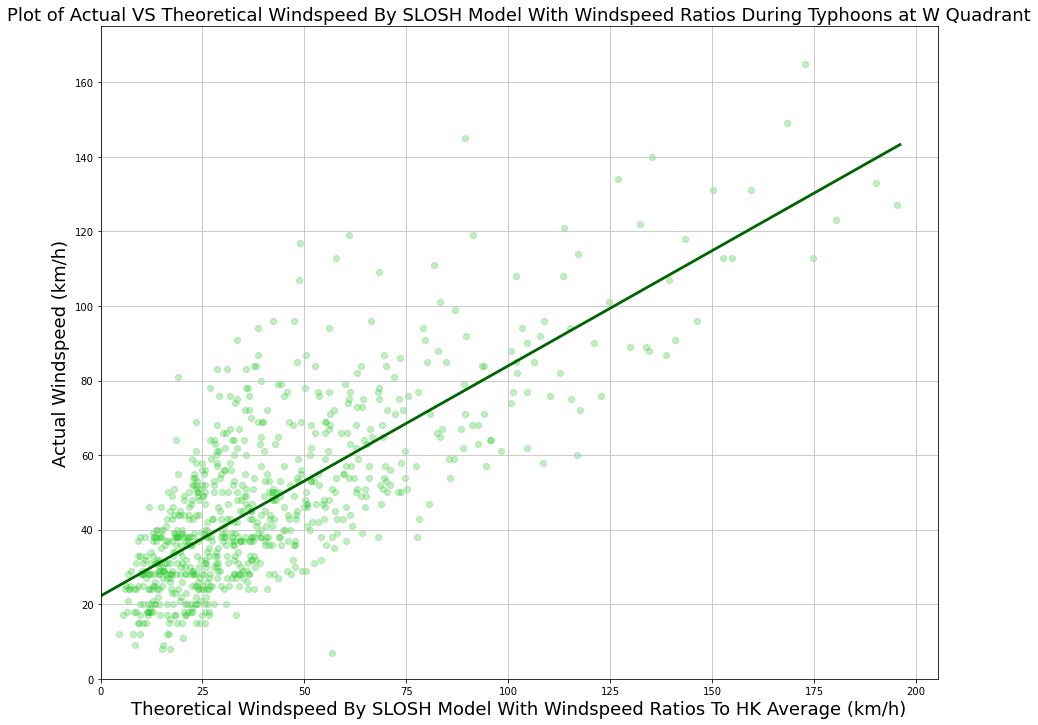

Slope, y Intercept:
0.6178403002289375 22.211547026513724
Correlation Coefficient:
0.7707923319872328


In [45]:
# Draw Scatter Plot of Actual Windspeeds With Theoretical Windspeed By SLOSH Model With Windspeed Ratios To HK Average During Typhoons Located at Western Quadrant
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[2], Quadrant_Windspeed_Ratio_List_No_Nan[2], c='limegreen', alpha=0.30)
pyplot.title('Plot of Actual VS Theoretical Windspeed By SLOSH Model With Windspeed Ratios During Typhoons at W Quadrant', \
fontsize=18)
Axes.set_xlabel('Theoretical Windspeed By SLOSH Model With Windspeed Ratios To HK Average (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, numpy.max(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[2])+10)
pyplot.ylim(0, numpy.max(Quadrant_Windspeed_Ratio_List_No_Nan[2])+10)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
W_Quadrant_Windspeed_Actual_SLOSH_Ratio_Slope, W_Quadrant_Windspeed_Actual_SLOSH_Ratio_Intercept = \
numpy.polyfit(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[2], Quadrant_Windspeed_Ratio_List_No_Nan[2], 1)
W_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_x = numpy.arange(numpy.max(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[2])+1)
W_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_Line = W_Quadrant_Windspeed_Actual_SLOSH_Ratio_Slope * \
W_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_x + W_Quadrant_Windspeed_Actual_SLOSH_Ratio_Intercept
pyplot.plot(W_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_x, W_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_Line, \
c='darkgreen', linewidth=2.8)
Fig.savefig('Actual_VS_SLOSH_Theoretical_Windspeed_With_Ratios_W_Quadrant_Scatter_Plot.png')
pyplot.show()
print ("Slope, y Intercept:")
print (W_Quadrant_Windspeed_Actual_SLOSH_Ratio_Slope, W_Quadrant_Windspeed_Actual_SLOSH_Ratio_Intercept)
#
# Find Correlation Coefficient
W_Quadrant_Windspeed_Actual_SLOSH_Ratio_Correlation_Matrix = numpy.corrcoef(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[2], \
Quadrant_Windspeed_Ratio_List_No_Nan[2])
W_Quadrant_Windspeed_Actual_SLOSH_Ratio_Correlation = W_Quadrant_Windspeed_Actual_SLOSH_Ratio_Correlation_Matrix[0][1]
print ("Correlation Coefficient:")
print (W_Quadrant_Windspeed_Actual_SLOSH_Ratio_Correlation)

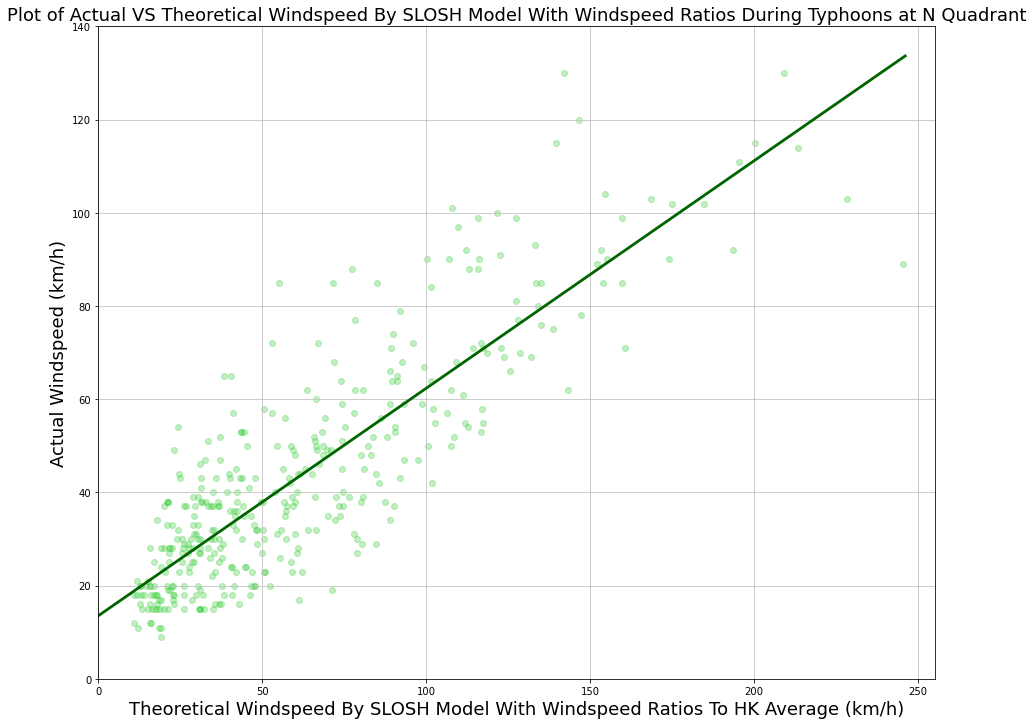

Slope, y Intercept:
0.48836330228312497 13.536141233936402
Correlation Coefficient:
0.8536749161909191


In [46]:
# Draw Scatter Plot of Actual Windspeeds With Theoretical Windspeed By SLOSH Model With Windspeed Ratios To HK Average During Typhoons Located at Northern Quadrant
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[3], Quadrant_Windspeed_Ratio_List_No_Nan[3], c='limegreen', alpha=0.30)
pyplot.title('Plot of Actual VS Theoretical Windspeed By SLOSH Model With Windspeed Ratios During Typhoons at N Quadrant', \
fontsize=18)
Axes.set_xlabel('Theoretical Windspeed By SLOSH Model With Windspeed Ratios To HK Average (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, numpy.max(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[3])+10)
pyplot.ylim(0, numpy.max(Quadrant_Windspeed_Ratio_List_No_Nan[3])+10)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fit and Find Correlation Coefficient
N_Quadrant_Windspeed_Actual_SLOSH_Ratio_Slope, N_Quadrant_Windspeed_Actual_SLOSH_Ratio_Intercept = \
numpy.polyfit(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[3], Quadrant_Windspeed_Ratio_List_No_Nan[3], 1)
N_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_x = numpy.arange(numpy.max(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[3])+1)
N_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_Line = N_Quadrant_Windspeed_Actual_SLOSH_Ratio_Slope * \
N_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_x + N_Quadrant_Windspeed_Actual_SLOSH_Ratio_Intercept
pyplot.plot(N_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_x, N_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_Line, \
c='darkgreen', linewidth=2.8)
Fig.savefig('Actual_VS_SLOSH_Theoretical_Windspeed_With_Ratios_N_Quadrant_Scatter_Plot.png')
pyplot.show()
print ("Slope, y Intercept:")
print (N_Quadrant_Windspeed_Actual_SLOSH_Ratio_Slope, N_Quadrant_Windspeed_Actual_SLOSH_Ratio_Intercept)
#s
# Find Correlation Coefficient
N_Quadrant_Windspeed_Actual_SLOSH_Ratio_Correlation_Matrix = numpy.corrcoef(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[3], \
Quadrant_Windspeed_Ratio_List_No_Nan[3])
N_Quadrant_Windspeed_Actual_SLOSH_Ratio_Correlation = N_Quadrant_Windspeed_Actual_SLOSH_Ratio_Correlation_Matrix[0][1]
print ("Correlation Coefficient:")
print (N_Quadrant_Windspeed_Actual_SLOSH_Ratio_Correlation)

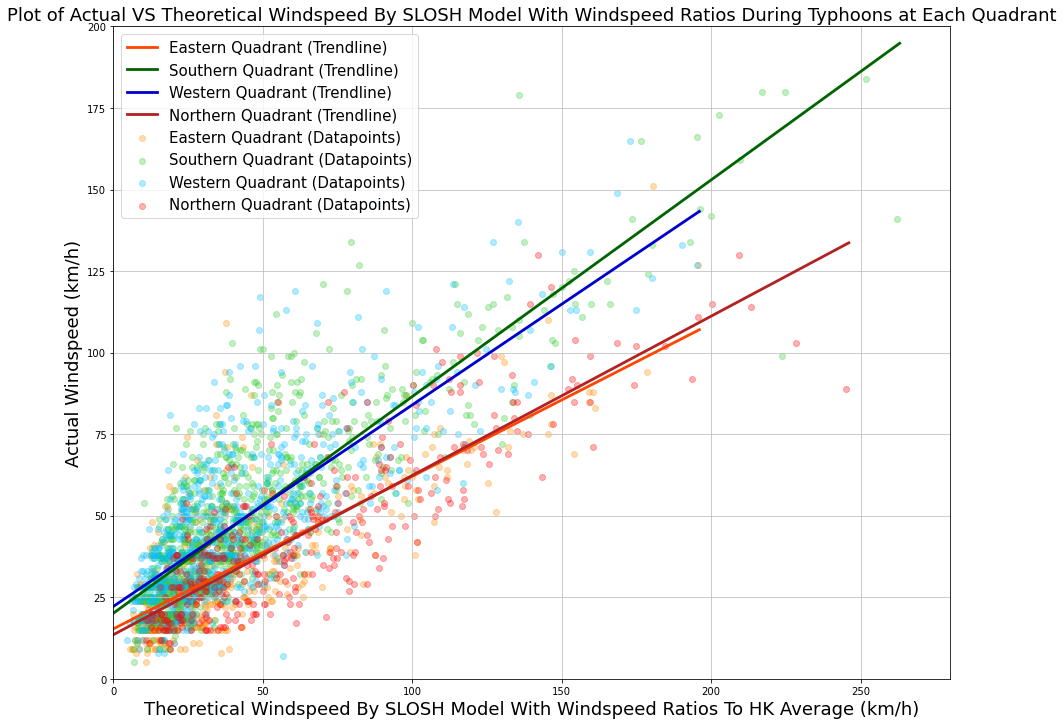

In [47]:
# Draw Scatter Plot of Actual Windspeeds With Theoretical Windspeed By SLOSH Model With Windspeed Ratios To HK Average During Typhoons Located at Each Quadrant
Fig = pyplot.figure(figsize=(15,12))
Axes = Fig.gca()
pyplot.scatter(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[0], Quadrant_Windspeed_Ratio_List_No_Nan[0], c='darkorange', alpha=0.30, \
label = 'Eastern Quadrant (Datapoints)')
pyplot.scatter(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[1], Quadrant_Windspeed_Ratio_List_No_Nan[1], c='limegreen', alpha=0.30, \
label = 'Southern Quadrant (Datapoints)')
pyplot.scatter(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[2], Quadrant_Windspeed_Ratio_List_No_Nan[2], c='deepskyblue', alpha=0.30, \
label = 'Western Quadrant (Datapoints)')
pyplot.scatter(Quadrant_SLOSH_Windspeed_Ratio_List_No_Nan[3], Quadrant_Windspeed_Ratio_List_No_Nan[3], c='red', alpha=0.30, \
label = 'Northern Quadrant (Datapoints)')
pyplot.title('Plot of Actual VS Theoretical Windspeed By SLOSH Model With Windspeed Ratios During Typhoons at Each Quadrant', \
fontsize=18)
Axes.set_xlabel('Theoretical Windspeed By SLOSH Model With Windspeed Ratios To HK Average (km/h)', fontsize=18)
Axes.set_ylabel('Actual Windspeed (km/h)', fontsize=18)
pyplot.rc('xtick', labelsize=10)
pyplot.rc('ytick', labelsize=10)
pyplot.xlim(0, 280)
pyplot.ylim(0, 200)
pyplot.grid('grid', linestyle="-", linewidth=0.8, color='silver')
#
# Plot Line of Best Fits
pyplot.plot(E_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_x, E_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_Line, c='orangered', \
linewidth=2.8, label = 'Eastern Quadrant (Trendline)')
pyplot.plot(S_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_x, S_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_Line, c='darkgreen', \
linewidth=2.8, label = 'Southern Quadrant (Trendline)')
pyplot.plot(W_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_x, W_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_Line, c='mediumblue', \
linewidth=2.8, label = 'Western Quadrant (Trendline)')
pyplot.plot(N_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_x, N_Quadrant_Windspeed_Actual_SLOSH_Ratio_Best_Fit_Line, c='firebrick', \
linewidth=2.8, label = 'Northern Quadrant (Trendline)')
pyplot.legend(loc=2, fontsize=15)
Fig.savefig('Actual_VS_SLOSH_Theoretical_Windspeed_With_Ratios_Quadrants_Scatter_Plot.png')
pyplot.show()